## Investigate a Dataset - European Soccer Database

## Data Set
European Soccer Database

## Overview and Notes
This soccer database comes from Kaggle and is well suited for data analysis and machine learning.  
It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.  
This dataset is quite extensive, and we encourage you to read more about it here.  
The database is stored in a SQLite database. You can access database files using software like DB Browser.  
This dataset will help you get good practice with your SQL joins.  
Make sure to look at how the different tables relate to each other.  
Some column titles should be self-explanatory, and others you’ll have to look up on Kaggle.  

## Sources

http://www.numpy.org  

https://pandas.pydata.org  

http://pandas.pydata.org/pandas-docs/version/0.9.1/visualization.html  

https://matplotlib.org/gallery.html  

https://seaborn.pydata.org  

https://www.udacity.com/course/intro-to-programming-nanodegree--nd000  

https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True  

https://www.kaggle.com/hugomathien/soccer  

https://github.com/georgezoto/Intro-to-Programming-Nanodegree/tree/11c4af90bf4e344656b93272a670f1c27bc5970a/Specialization/Data%20Analysis/Investigate%20a%20Dataset%20-%20European%20Soccer%20Database  



## Example Questions
How many goals has each team scored home, away and total on each season?  
How many goals has each team allowed home, away and total on each season?  
How teams improved or deterioted over time and what teams improved or deterioted the most and the least in terms of goals scored or allowed over time?  
How many goals has each team allowed home, away and total, from other teams, over all seasons?  
Which players had the most penalties?  
What team attributes lead to the most victories?  

## Import data analysis modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

## Connect to local sqlite database with the following tables:  
## Country, League, Match, Player, Player_Attributes, Team, Team_Attributes

In [2]:
connection = sqlite3.connect('database.sqlite')

## Run any query, store and display results in a DataFrame
## Select Country, League, Date, Team Home, Team Away and final score for every match in the dataset that belongs to the Spanish LIGA BBVA league.

In [3]:
query = '''
select 
    Country.name as Country, 
    League.name as League, 
    Match.season as Season,
    date(Match.date) as Date,
    Team_home.team_long_name as Team_Home, 
    Team_away.team_long_name as Team_Away, 
    Match.home_team_goal as Team_Home_Goal, 
    Match.away_team_goal as Team_Away_Goal
from
    Country, League, Team as Team_home, Team as Team_away, Match
where
    Country.id = League.country_id AND
    Country.id = Match.country_id AND
    League.id = Match.league_id AND
    Team_home.team_api_id = Match.home_team_api_id AND
    Team_away.team_api_id = Match.away_team_api_id AND
    Country = 'Spain' AND
    League.name = 'Spain LIGA BBVA'
order by
    Match.date
-- limit 10;
'''

#Run query and store results in a dataframe
spain_liga_bbva_df = pd.read_sql(query,connection)

## Print dataframe columns

In [4]:
print(spain_liga_bbva_df.columns)

Index([u'Country', u'League', u'Season', u'Date', u'Team_Home', u'Team_Away',
       u'Team_Home_Goal', u'Team_Away_Goal'],
      dtype='object')


## Create helpful funtions that will be used repeatedly for resetting an index of an input series, store result in a dataframe, pivot it  so that each Season is a seperate column and finally plot its input columns over its input index

In [5]:
"""
reset_index_pivot_stacked_bar_plot_series(Args) is used for resetting an index of an input series, store result in a dataframe, pivot it so that each Season is a seperate column and finally plot its input columns over its input index.

Args:
    plot_type: Type of chart plotted, 'stacked_bar' or 'heat_map' 
    season_team_scored_allowed_sum: input pandas Series containing Season, Team and sum of goals scored or allowed for each season 
    index: 'Team_Home' or 'Team_Away' or 'Team' index used for x label plotting
    columns: Columns to pivot resulting dataframe, usually 'Season', used as x label subplotting
    values: 'Team_Home_Goal' or 'Team_Away_Goal' or 'Team_Goal' or 'Team_Allowed' columns used as values of a plot
    title: Title of a plot
    xlabel: X axis label of a plot
    ylabel: Y axis label of a plot
    
Returns:
    Pivoted DataFrame with each Season in a seperate column.

Raises:
    None
"""
def reset_index_pivot_plot_series(plot_type, plot_color, season_team_scored_allowed_sum, \
    input_index, input_columns, input_values, title, xlabel, ylabel, reset_flag, pivot_flag):
    
    if reset_flag:
        #Reset index of series so 'Season' column is fully populated, store in pandas DataFrame
        season_team_scored_allowed_sum = season_team_scored_allowed_sum.reset_index()
    if pivot_flag:
        #Pivot dataframe so that each Season is a seperate column, needed for multi-series plots
        season_team_scored_allowed_sum = season_team_scored_allowed_sum.pivot(index=input_index, columns=input_columns, values=input_values)
    
    if plot_type == 'stacked_bar':
        #Plot a stacked bar of final DataFrame with details provided 
        season_team_scored_allowed_sum.plot(kind='bar', stacked=True, figsize=(20, 15))
    elif plot_type == 'heat_map':
        #Plot a heat map of final DataFrame with details provided 
        plt.subplots(figsize=(20,15))
        sns.heatmap(season_team_scored_allowed_sum, annot=True, cmap=plot_color)
    else:
        #Plot a stacked bar of final DataFrame with details provided 
        season_team_scored_allowed_sum.plot(kind='bar', stacked=True, figsize=(20, 15))
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    #Return final DataFrame
    return season_team_scored_allowed_sum

## Compute home and away goals scored per season and add them up, store in pandas Series

In [6]:
season_team_home_goal_sum = spain_liga_bbva_df.groupby(['Season', 'Team_Home'])['Team_Home_Goal'].sum()
season_team_away_goal_sum = spain_liga_bbva_df.groupby(['Season', 'Team_Away'])['Team_Away_Goal'].sum()
season_team_goal_sum = season_team_home_goal_sum + season_team_away_goal_sum
print type(season_team_home_goal_sum)
print season_team_home_goal_sum.head(30)

<class 'pandas.core.series.Series'>
Season     Team_Home                
2008/2009  Athletic Club de Bilbao      28
           Atlético Madrid              47
           CA Osasuna                   27
           CD Numancia                  23
           FC Barcelona                 61
           Getafe CF                    27
           Málaga CF                    28
           RC Deportivo de La Coruña    30
           RC Recreativo                17
           RCD Espanyol                 28
           RCD Mallorca                 33
           Racing Santander             28
           Real Betis Balompié          24
           Real Madrid CF               49
           Real Sporting de Gijón       24
           Real Valladolid              22
           Sevilla FC                   28
           UD Almería                   27
           Valencia CF                  47
           Villarreal CF                33
2009/2010  Athletic Club de Bilbao      34
           Atlético Madr

## Question 1a: How many goals has each team scored home on each season?  
## Answer 1a: Home goals scored per Season

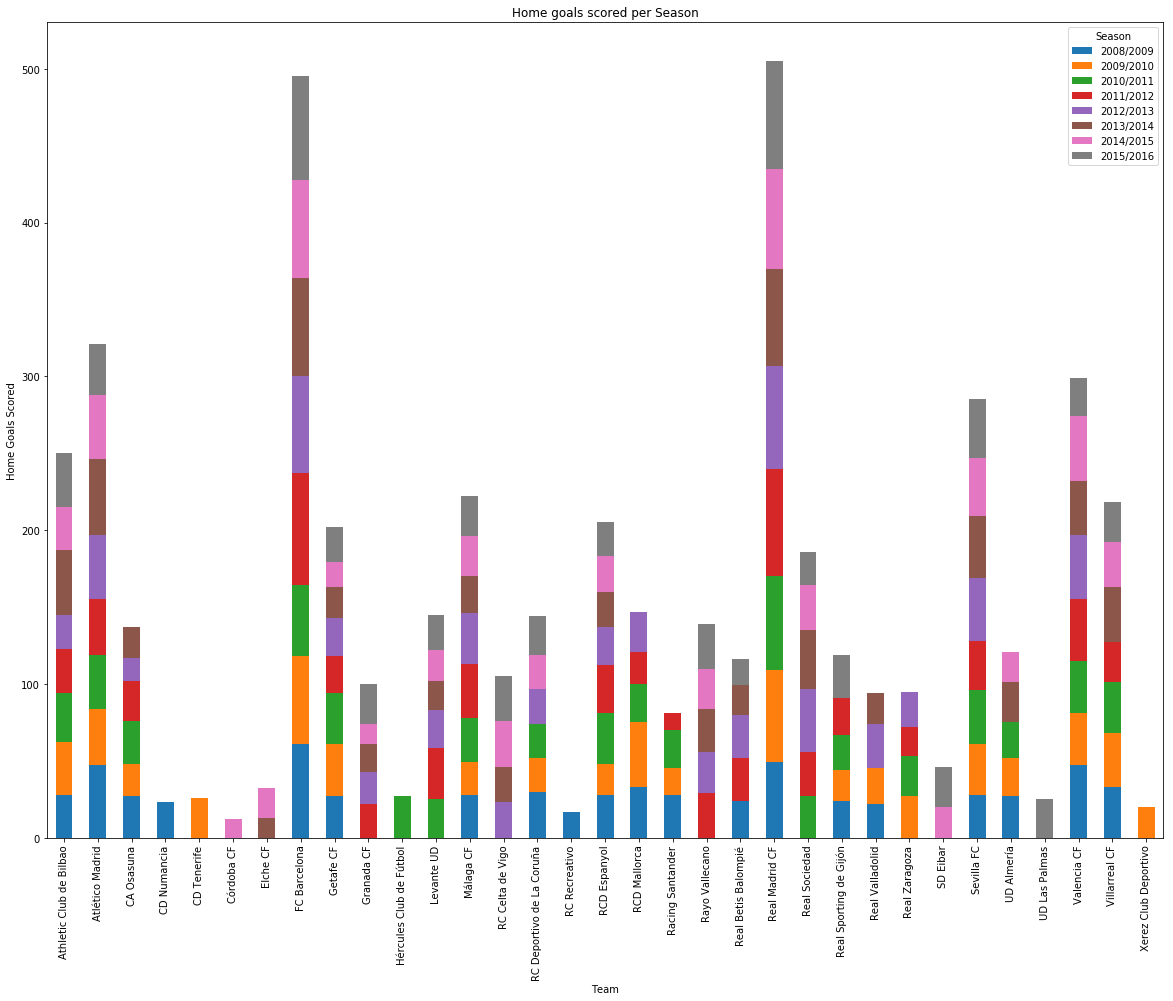

Season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Team_Home,,,,,,,,
Athletic Club de Bilbao,28.0,34.0,32.0,29.0,22.0,42.0,28.0,35.0
Atlético Madrid,47.0,37.0,35.0,36.0,42.0,49.0,42.0,33.0
CA Osasuna,27.0,21.0,28.0,26.0,15.0,20.0,NaN,NaN
CD Numancia,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Tenerife,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
season_team_home_goal_sum = reset_index_pivot_plot_series('stacked_bar', '', season_team_home_goal_sum, \
    'Team_Home', 'Season', 'Team_Home_Goal', 'Home goals scored per Season', 'Team', 'Home Goals Scored', True, True)
season_team_home_goal_sum.head()

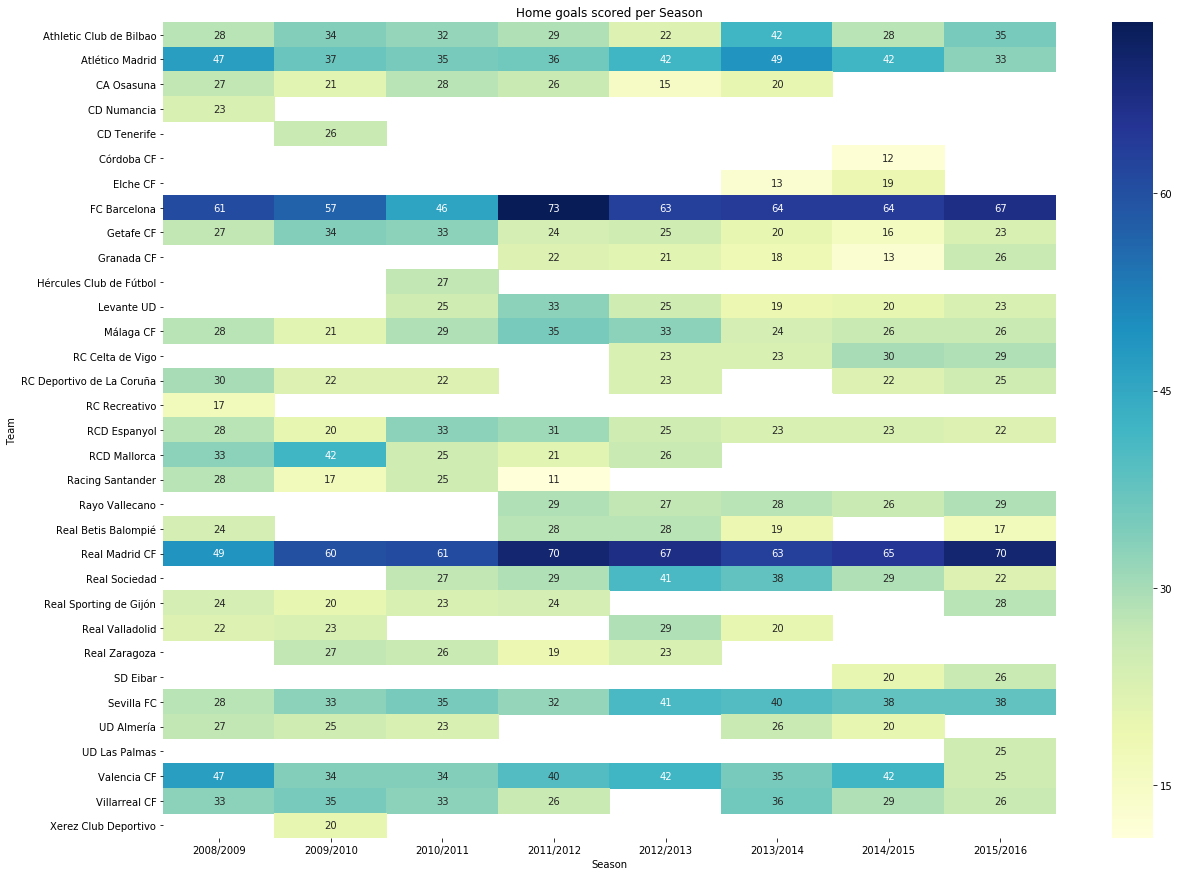

In [8]:
season_team_home_goal_sum = reset_index_pivot_plot_series('heat_map', 'YlGnBu', season_team_home_goal_sum, \
    'Team_Home', 'Season', 'Team_Home_Goal', 'Home goals scored per Season', 'Season', 'Team', False, False)

## Question 1b: How teams improved over time and what teams improved the most and the least in terms of goals scored home over time?
## Answer 1b: Home goals scored over Seasons

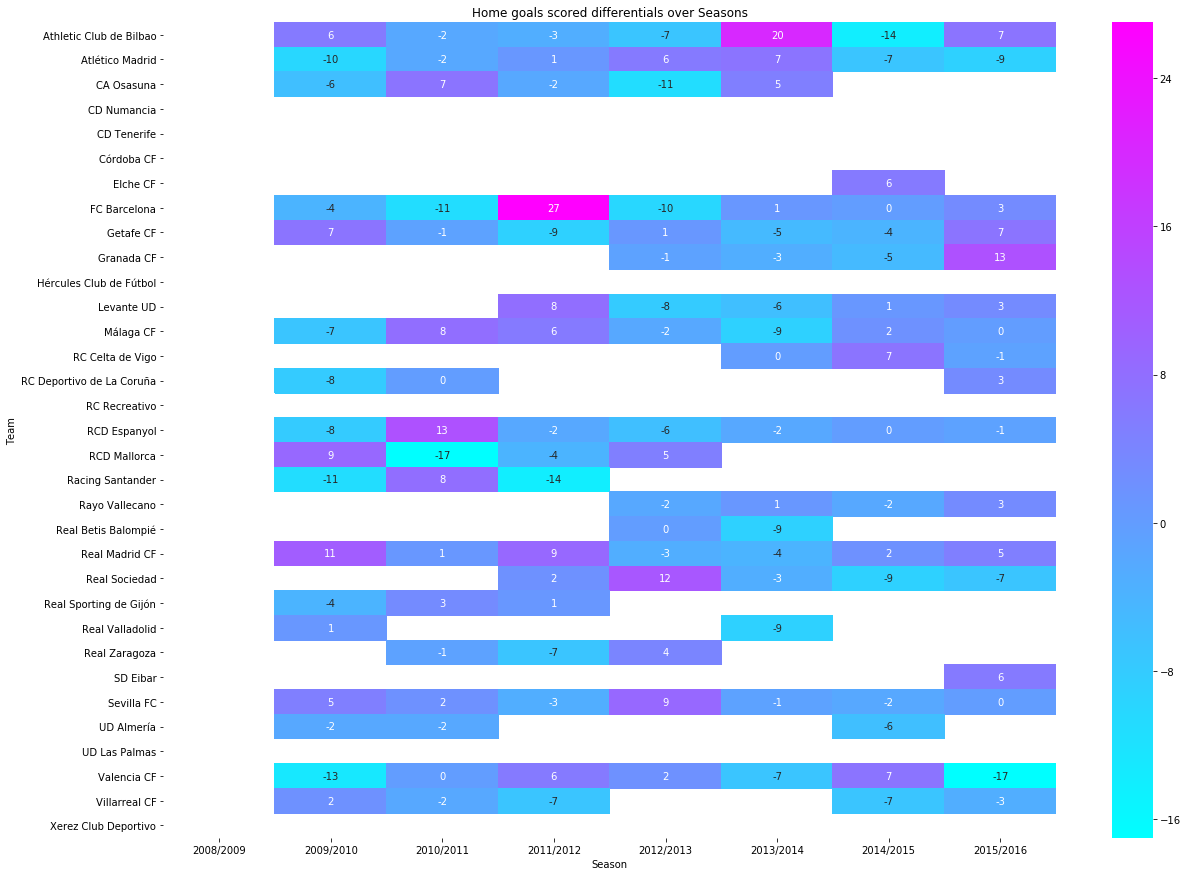

In [9]:
season_team_home_goal_sum_diff = season_team_home_goal_sum.diff(periods=1, axis='columns')

season_team_home_goal_sum_diff = reset_index_pivot_plot_series('heat_map', 'cool', season_team_home_goal_sum_diff, \
    'Team_Home', 'Season', 'Team_Home_Goal', 'Home goals scored differentials over Seasons', 'Season', 'Team', False, False)

## Question 2a: How many goals has each team scored away on each season?  
## Answer 2a: Away goals scored per Season

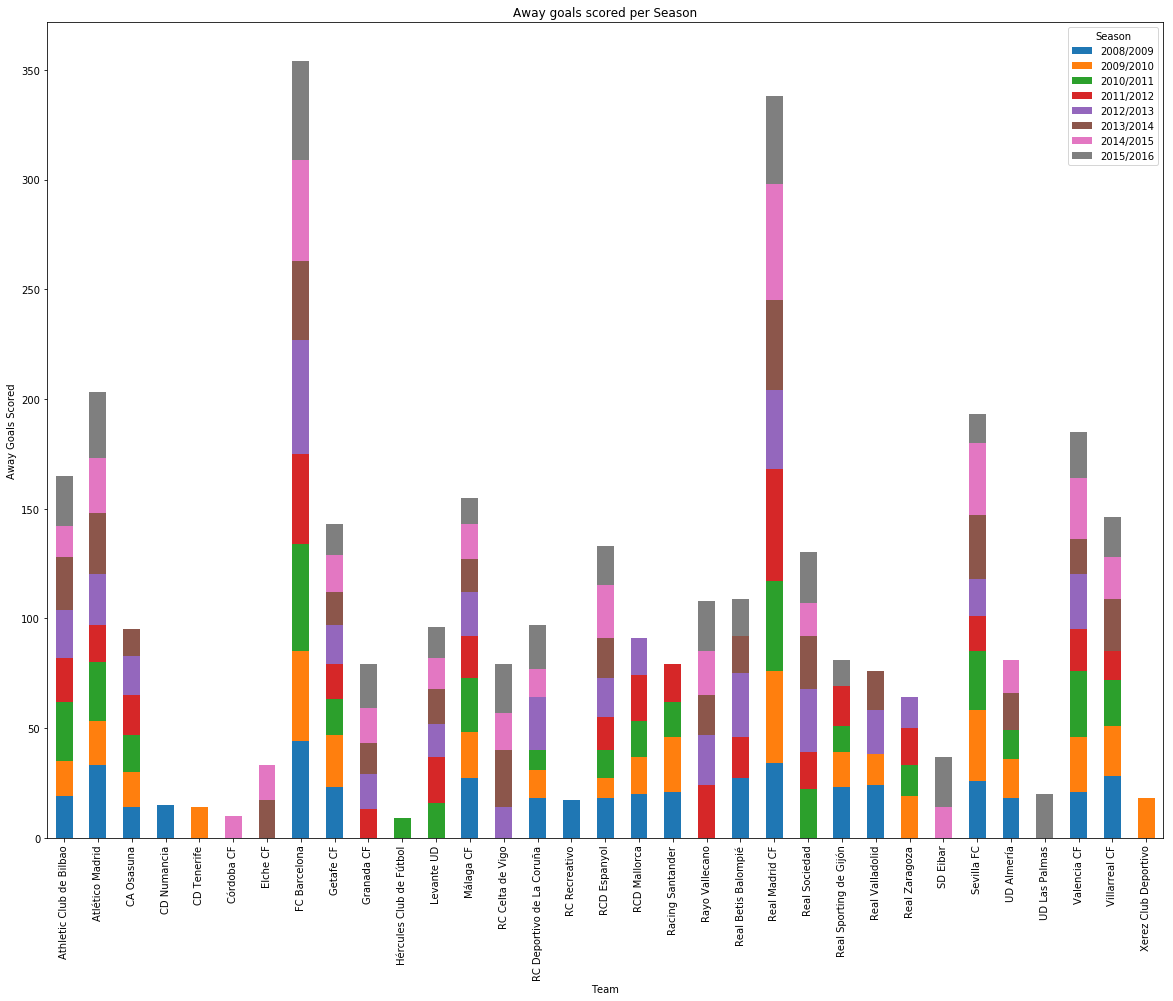

Season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Team_Away,,,,,,,,
Athletic Club de Bilbao,19.0,16.0,27.0,20.0,22.0,24.0,14.0,23.0
Atlético Madrid,33.0,20.0,27.0,17.0,23.0,28.0,25.0,30.0
CA Osasuna,14.0,16.0,17.0,18.0,18.0,12.0,NaN,NaN
CD Numancia,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Tenerife,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
season_team_away_goal_sum = reset_index_pivot_plot_series('stacked_bar', '', season_team_away_goal_sum, \
    'Team_Away', 'Season', 'Team_Away_Goal', 'Away goals scored per Season', 'Team', 'Away Goals Scored', True, True)
season_team_away_goal_sum.head()

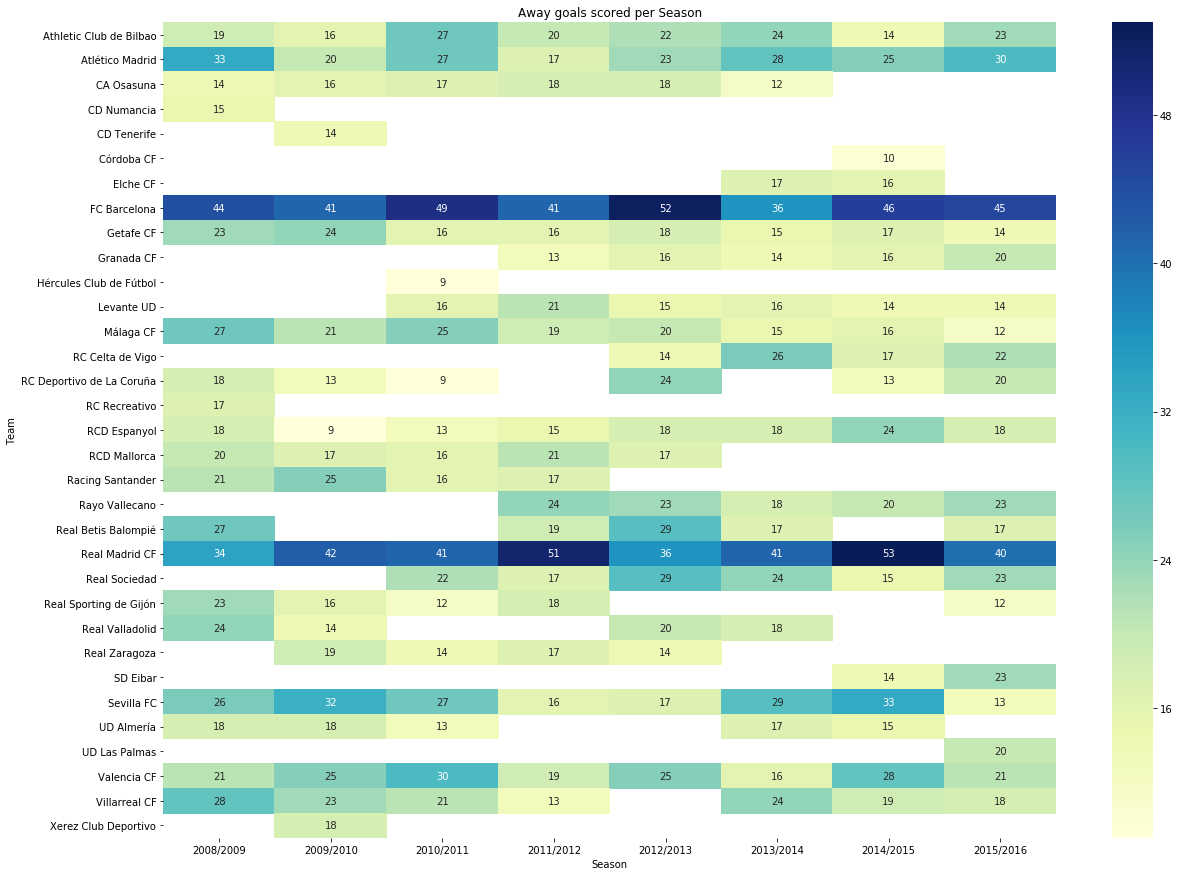

In [11]:
season_team_away_goal_sum = reset_index_pivot_plot_series('heat_map', 'YlGnBu', season_team_away_goal_sum, \
    'Team_Away', 'Season', 'Team_Away_Goal', 'Away goals scored per Season', 'Season', 'Team', False, False)

## Question 2b: How teams improved over time and what teams improved the most and the least in terms of goals scored away over time?
## Answer 2b: Away goals scored over Seasons

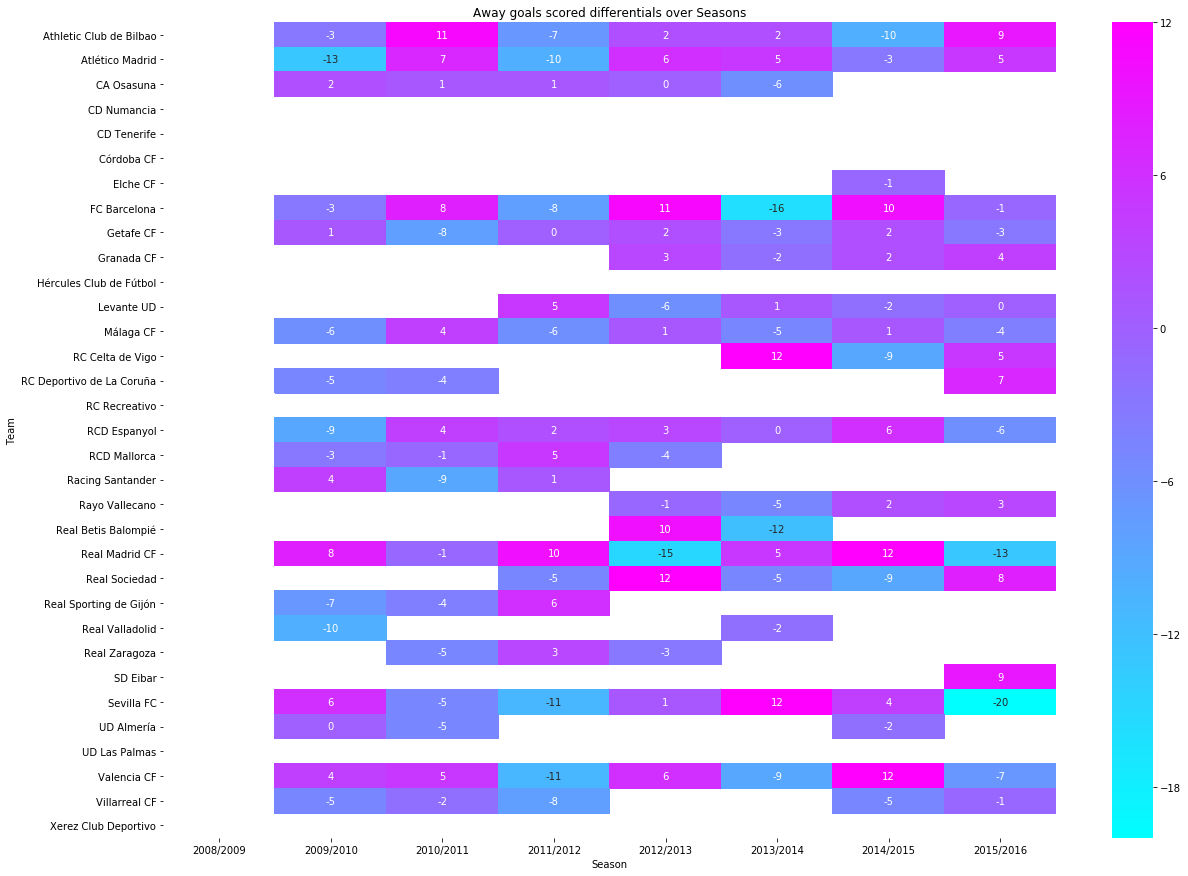

In [12]:
season_team_away_goal_sum_diff = season_team_away_goal_sum.diff(periods=1, axis='columns')

season_team_away_goal_sum_diff = reset_index_pivot_plot_series('heat_map', 'cool', season_team_away_goal_sum_diff, \
    'Team_Away', 'Season', 'Team_Away_Goal', 'Away goals scored differentials over Seasons', 'Season', 'Team', False, False)

## Question 3a: How many goals has each team scored on each season?  
## Answer 3a: Total goals scored per Season

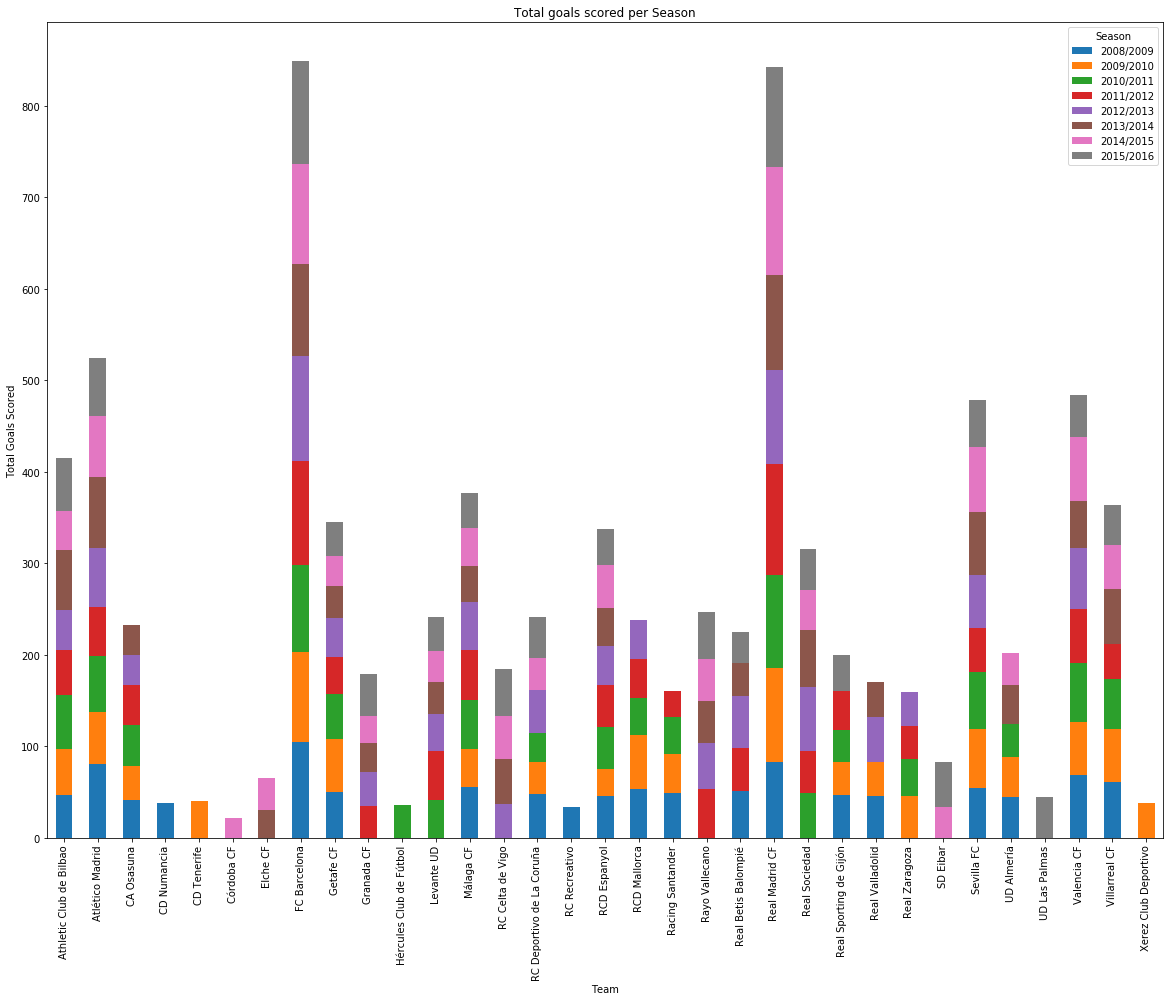

Season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Team,,,,,,,,
Athletic Club de Bilbao,47.0,50.0,59.0,49.0,44.0,66.0,42.0,58.0
Atlético Madrid,80.0,57.0,62.0,53.0,65.0,77.0,67.0,63.0
CA Osasuna,41.0,37.0,45.0,44.0,33.0,32.0,NaN,NaN
CD Numancia,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Tenerife,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
season_team_goal_sum = season_team_goal_sum.reset_index()
season_team_goal_sum.rename(columns={'Season': 'Season', 'Team_Home': 'Team', 0: 'Team_Goal'}, inplace=True)

season_team_goal_sum = reset_index_pivot_plot_series('stacked_bar', '', season_team_goal_sum, \
    'Team', 'Season', 'Team_Goal', 'Total goals scored per Season', 'Team', 'Total Goals Scored', False, True)
season_team_goal_sum.head()

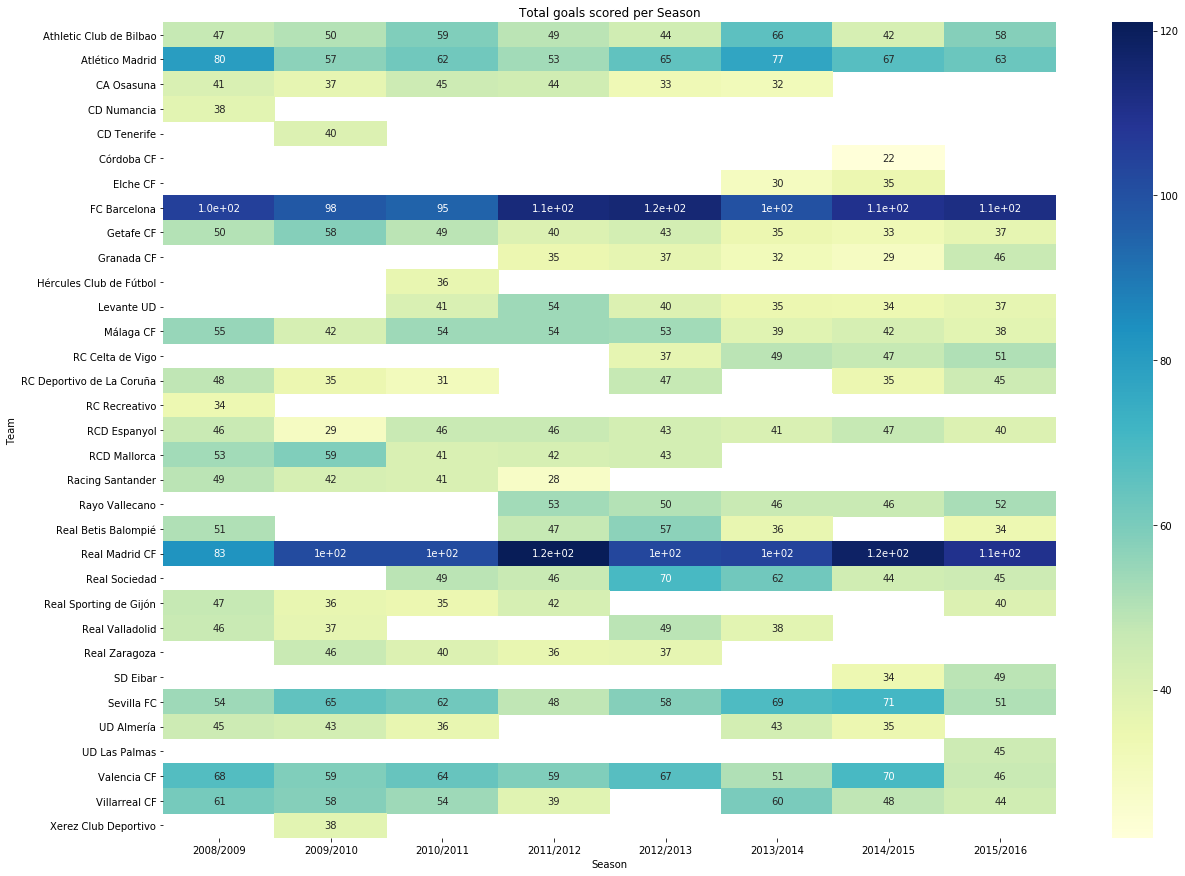

In [14]:
season_team_goal_sum = reset_index_pivot_plot_series('heat_map', 'YlGnBu', season_team_goal_sum, \
    'Team', 'Season', 'Team_Goal', 'Total goals scored per Season', 'Season', 'Team', False, False)

## Question 3b: How teams improved over time and what teams improved the most and the least in terms of total goals scored over time?
## Answer 3b: Total goals scored over Seasons

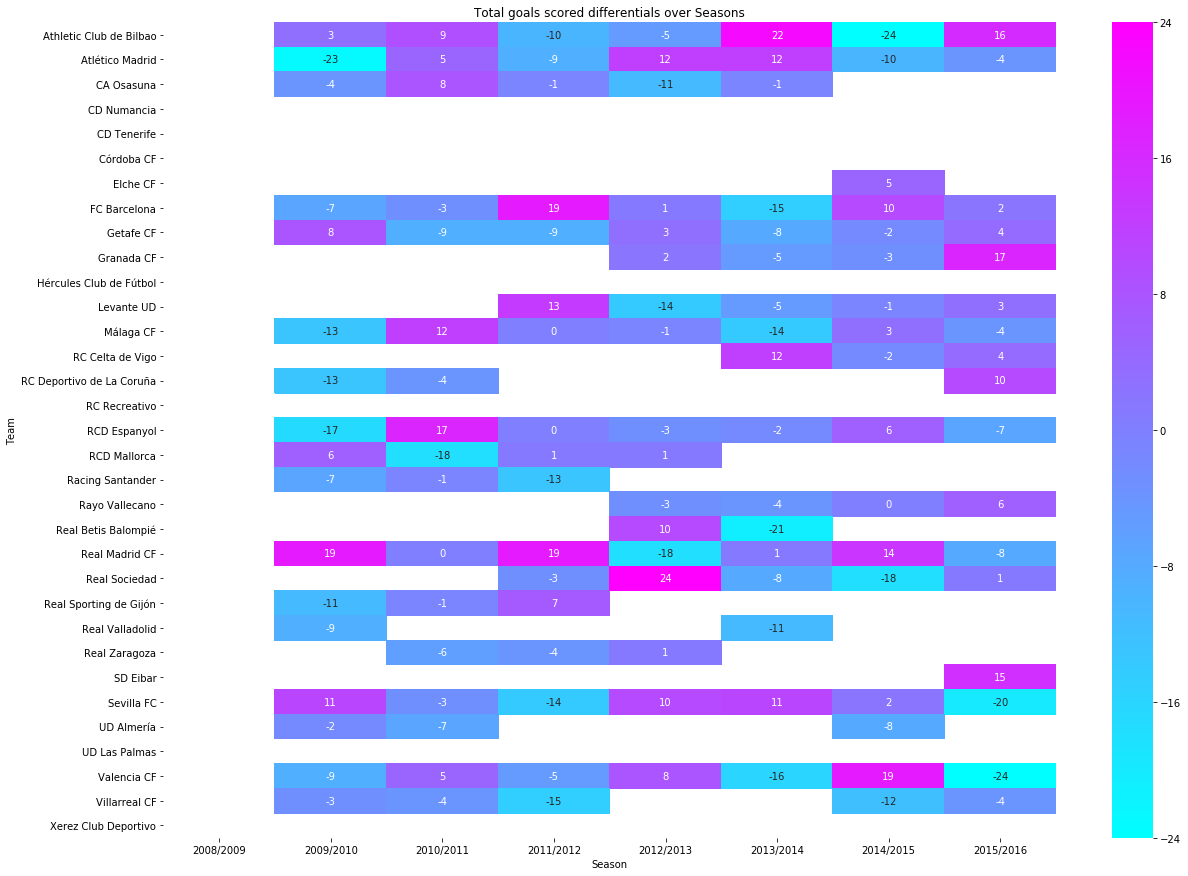

In [15]:
season_team_goal_sum_diff = season_team_goal_sum.diff(periods=1, axis='columns')

season_team_goal_sum_diff = reset_index_pivot_plot_series('heat_map', 'cool', season_team_goal_sum_diff, \
    'Team', 'Season', 'Team_Goal', 'Total goals scored differentials over Seasons', 'Season', 'Team', False, False)

## Compute home and away goals allowed per season and add them up, store in pandas Series

In [16]:
season_team_home_allowed_sum = spain_liga_bbva_df.groupby(['Season', 'Team_Home'])['Team_Away_Goal'].sum()
season_team_away_allowed_sum = spain_liga_bbva_df.groupby(['Season', 'Team_Away'])['Team_Home_Goal'].sum()
season_team_allowed_sum = season_team_home_allowed_sum + season_team_away_allowed_sum
print type(season_team_home_allowed_sum)
print season_team_home_allowed_sum.head(30)

<class 'pandas.core.series.Series'>
Season     Team_Home                
2008/2009  Athletic Club de Bilbao      29
           Atlético Madrid              23
           CA Osasuna                   22
           CD Numancia                  22
           FC Barcelona                 14
           Getafe CF                    23
           Málaga CF                    23
           RC Deportivo de La Coruña    18
           RC Recreativo                29
           RCD Espanyol                 22
           RCD Mallorca                 24
           Racing Santander             22
           Real Betis Balompié          25
           Real Madrid CF               29
           Real Sporting de Gijón       37
           Real Valladolid              17
           Sevilla FC                   20
           UD Almería                   20
           Valencia CF                  26
           Villarreal CF                25
2009/2010  Athletic Club de Bilbao      24
           Atlético Madr

## Question 4a: How many goals has each team allowed home on each season?  
## Answer 4a: Home goals allowed per Season

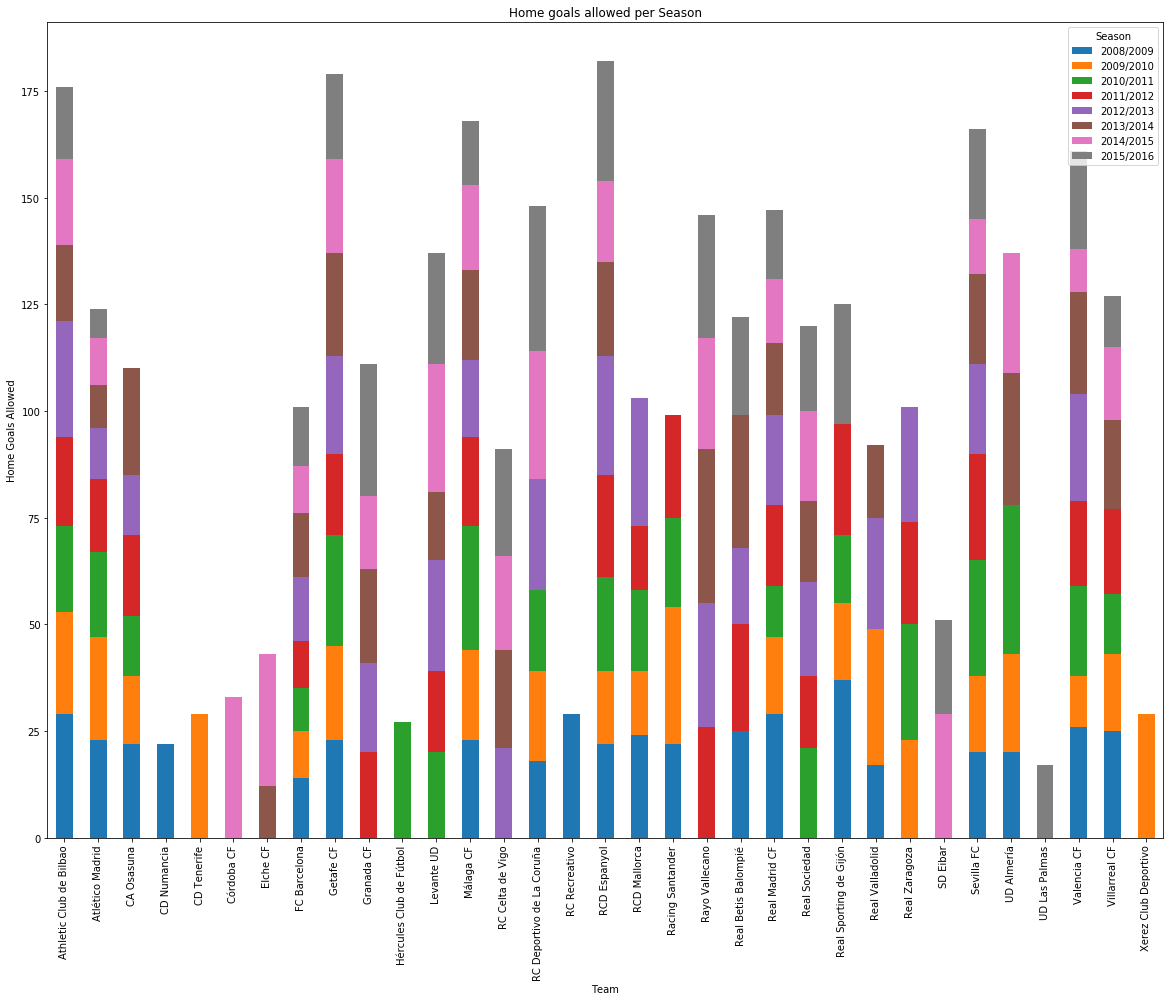

Season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Team_Home,,,,,,,,
Athletic Club de Bilbao,29.0,24.0,20.0,21.0,27.0,18.0,20.0,17.0
Atlético Madrid,23.0,24.0,20.0,17.0,12.0,10.0,11.0,7.0
CA Osasuna,22.0,16.0,14.0,19.0,14.0,25.0,NaN,NaN
CD Numancia,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Tenerife,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
season_team_home_allowed_sum = reset_index_pivot_plot_series('stacked_bar', '', season_team_home_allowed_sum, \
    'Team_Home', 'Season', 'Team_Away_Goal', 'Home goals allowed per Season', 'Team', 'Home Goals Allowed', True, True)
season_team_home_allowed_sum.head()

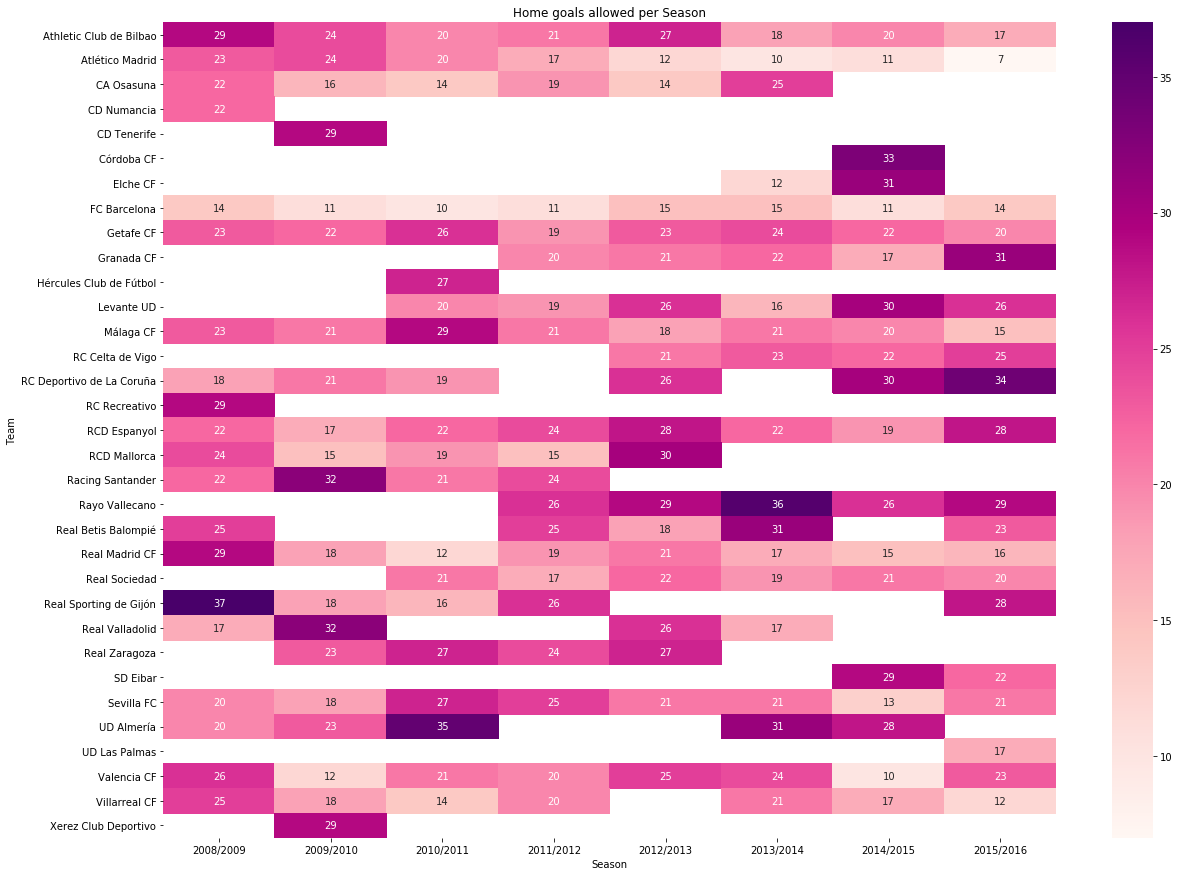

In [18]:
season_team_home_allowed_sum = reset_index_pivot_plot_series('heat_map', 'RdPu', season_team_home_allowed_sum, \
    'Team_Home', 'Season', 'Team_Away_Goal', 'Home goals allowed per Season', 'Season', 'Team', False, False)

## Question 4b: How teams deteriorated over time and what teams deteriorated the most and the least in terms of goals allowed home over time?
## Answer 4b: Home goals allowed over Seasons

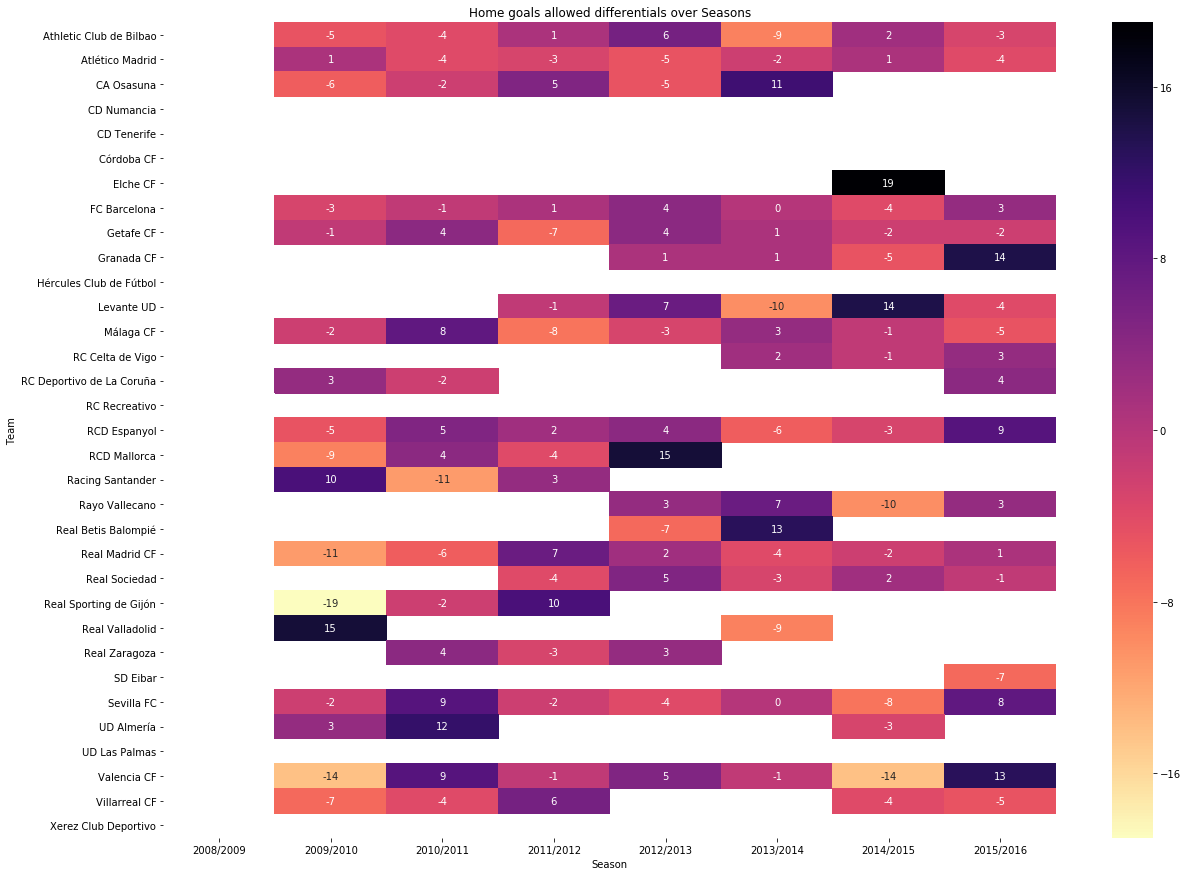

In [19]:
season_team_home_allowed_sum_diff = season_team_home_allowed_sum.diff(periods=1, axis='columns')

season_team_home_allowed_sum_diff = reset_index_pivot_plot_series('heat_map', 'magma_r', season_team_home_allowed_sum_diff, \
    'Team_Home', 'Season', 'Team_Away_Goal', 'Home goals allowed differentials over Seasons', 'Season', 'Team', False, False)

## Question 5a: How many goals has each team allowed away on each season?
## Answer 5a: Away goals allowed per Season

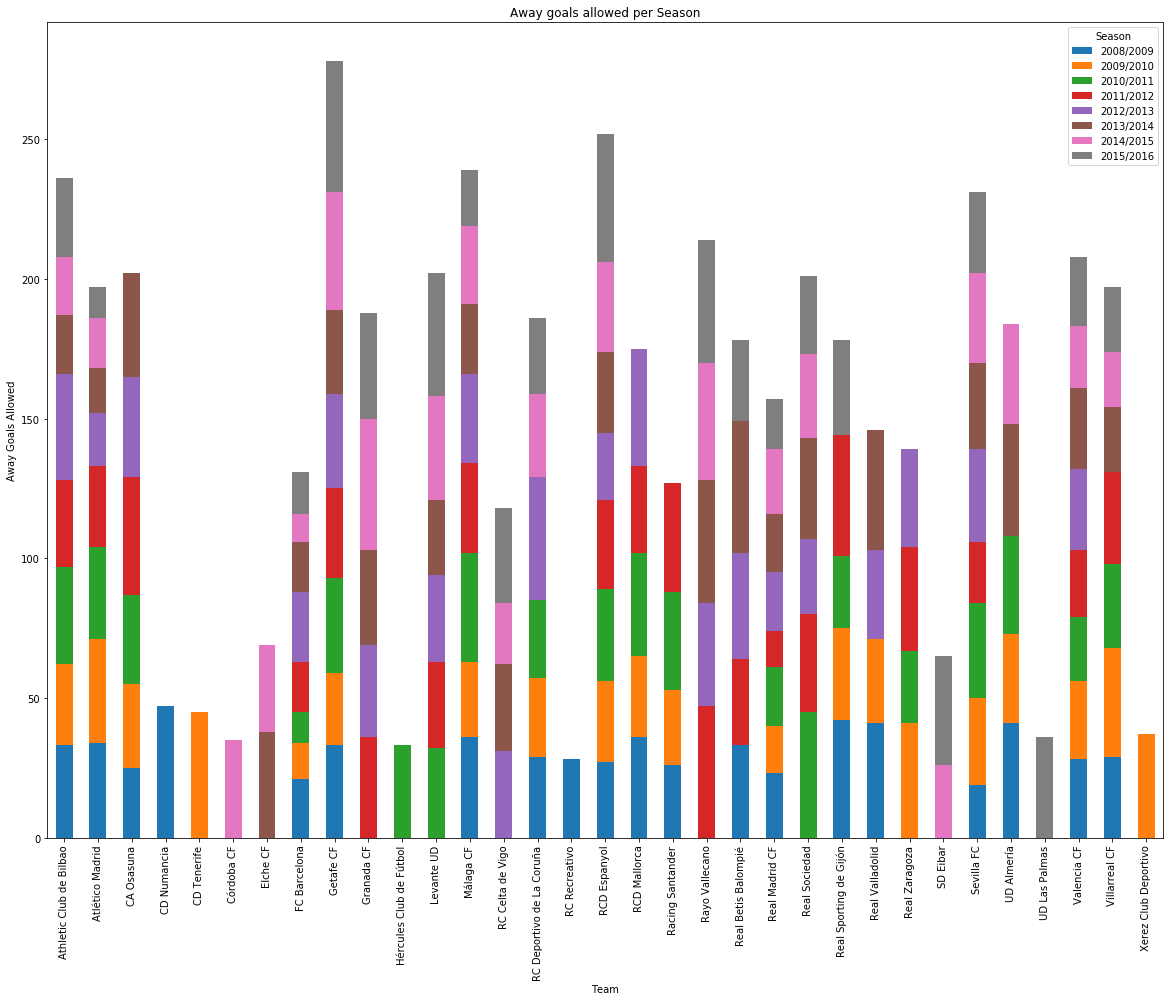

Season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Team_Away,,,,,,,,
Athletic Club de Bilbao,33.0,29.0,35.0,31.0,38.0,21.0,21.0,28.0
Atlético Madrid,34.0,37.0,33.0,29.0,19.0,16.0,18.0,11.0
CA Osasuna,25.0,30.0,32.0,42.0,36.0,37.0,NaN,NaN
CD Numancia,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Tenerife,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
season_team_away_allowed_sum = reset_index_pivot_plot_series('stacked_bar', '', season_team_away_allowed_sum, \
    'Team_Away', 'Season', 'Team_Home_Goal', 'Away goals allowed per Season', 'Team', 'Away Goals Allowed', True, True)
season_team_away_allowed_sum.head()

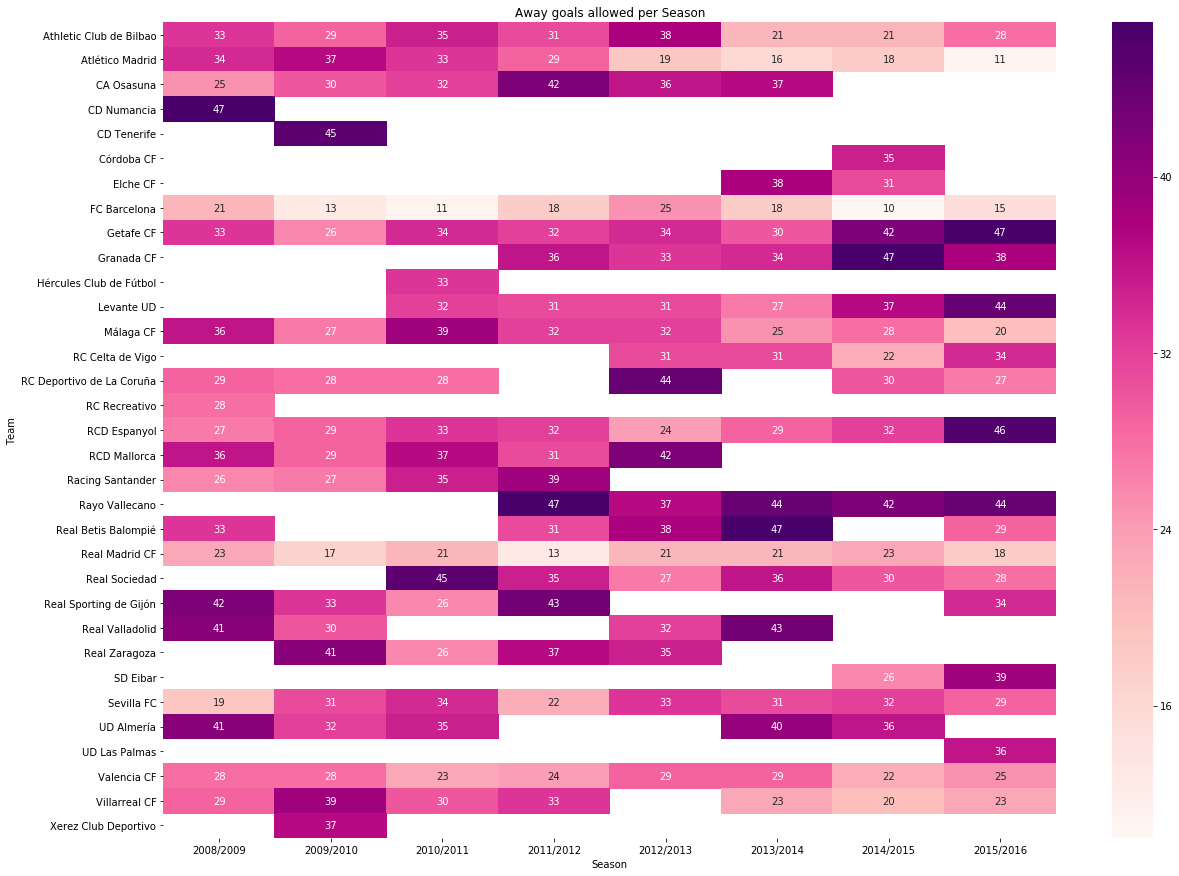

In [21]:
season_team_away_allowed_sum = reset_index_pivot_plot_series('heat_map', 'RdPu', season_team_away_allowed_sum, \
    'Team_Away', 'Season', 'Team_Home_Goal', 'Away goals allowed per Season', 'Season', 'Team', False, False)

## Question 5b: How teams deteriorated over time and what teams deteriorated the most and the least in terms of goals allowed away over time?
## Answer 5b: Away goals allowed over Seasons

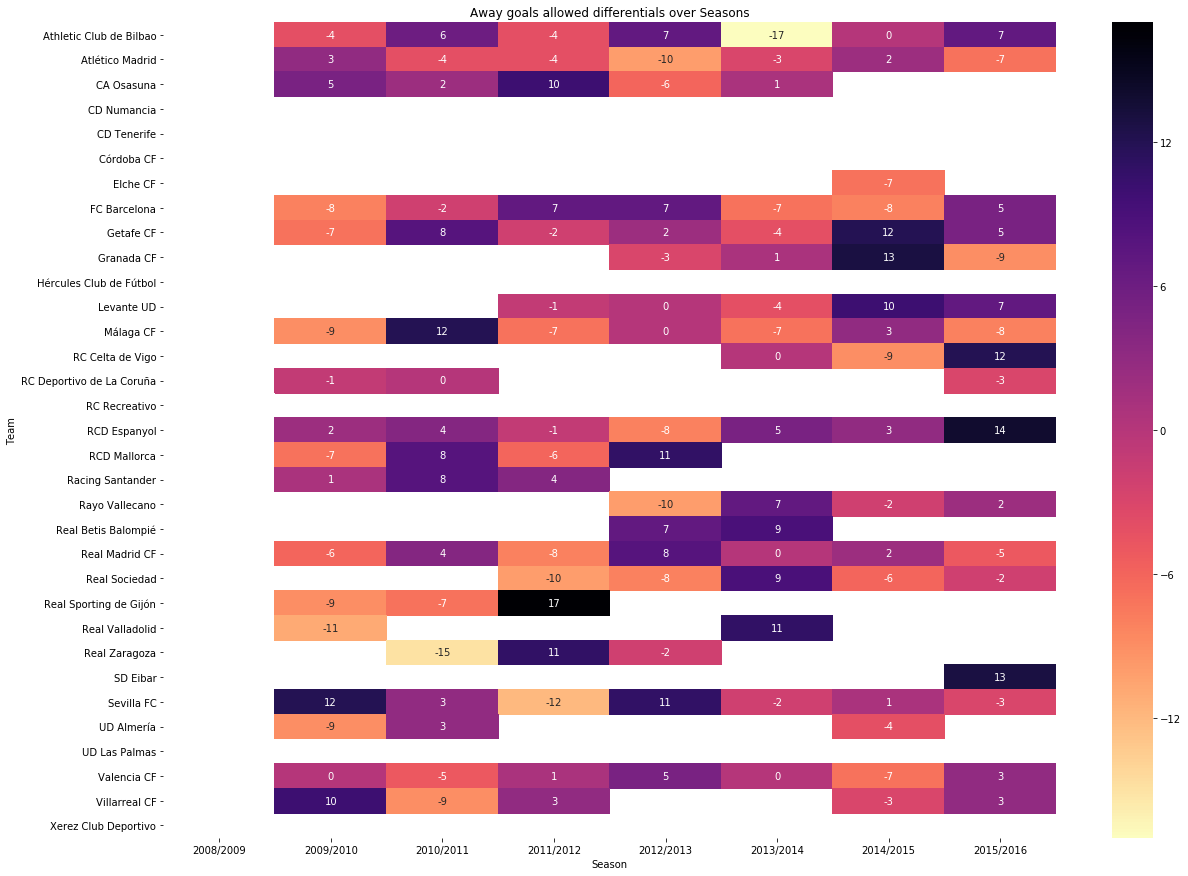

In [22]:
season_team_away_allowed_sum_diff = season_team_away_allowed_sum.diff(periods=1, axis='columns')

season_team_away_allowed_sum_diff = reset_index_pivot_plot_series('heat_map', 'magma_r', season_team_away_allowed_sum_diff, \
    'Team_Away', 'Season', 'Team_Home_Goal', 'Away goals allowed differentials over Seasons', 'Season', 'Team', False, False)

## Question 6a: How many goals has each team allowed on each season?
## Answer 6a: Total goals allowed per Season

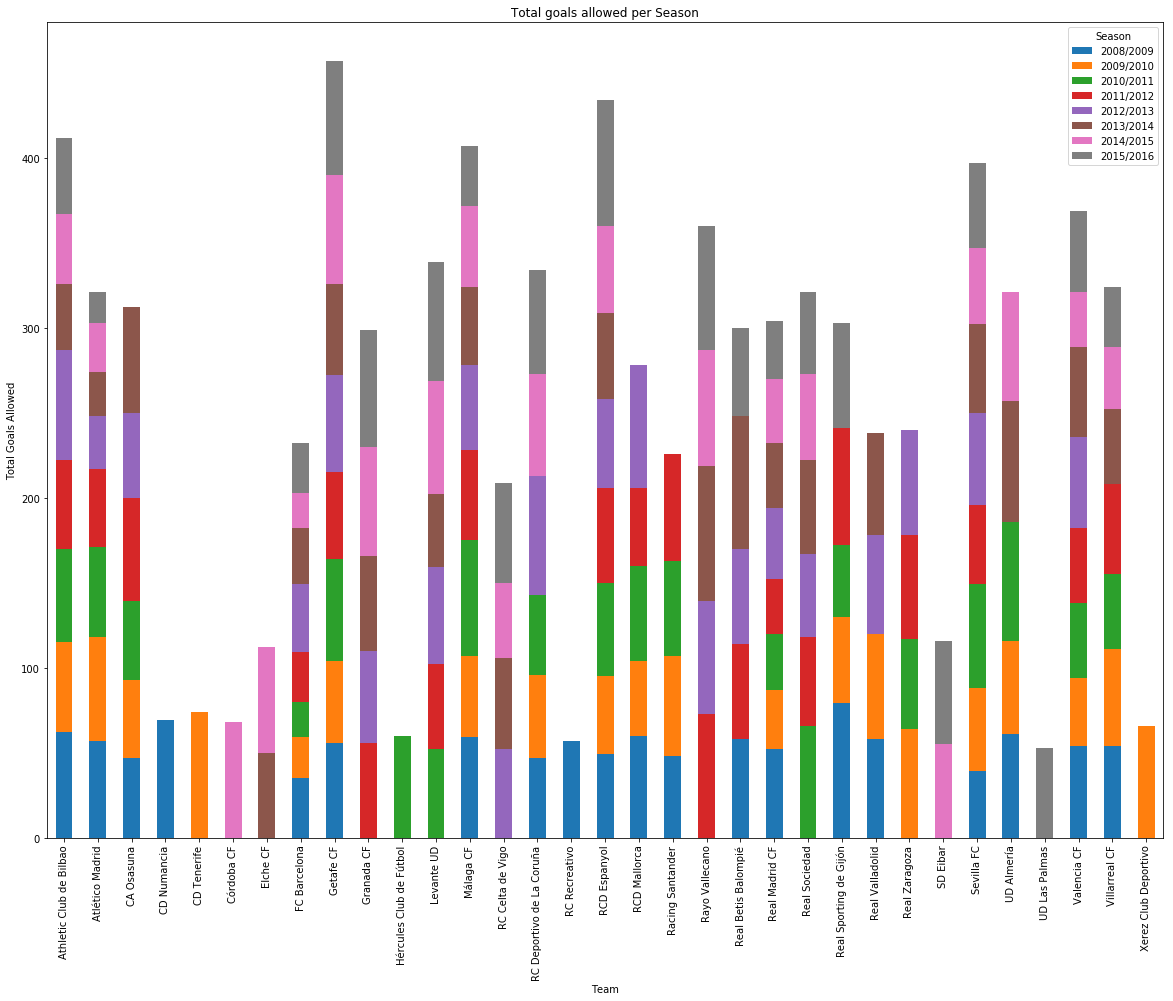

Season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Team,,,,,,,,
Athletic Club de Bilbao,62.0,53.0,55.0,52.0,65.0,39.0,41.0,45.0
Atlético Madrid,57.0,61.0,53.0,46.0,31.0,26.0,29.0,18.0
CA Osasuna,47.0,46.0,46.0,61.0,50.0,62.0,NaN,NaN
CD Numancia,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Tenerife,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
season_team_allowed_sum = season_team_allowed_sum.reset_index()
season_team_allowed_sum.rename(columns={'Season': 'Season', 'Team_Home': 'Team', 0: 'Team_Allowed'}, inplace=True)

season_team_allowed_sum = reset_index_pivot_plot_series('stacked_bar', '', season_team_allowed_sum, \
    'Team', 'Season', 'Team_Allowed', 'Total goals allowed per Season', 'Team', 'Total Goals Allowed', False, True)
season_team_allowed_sum.head()

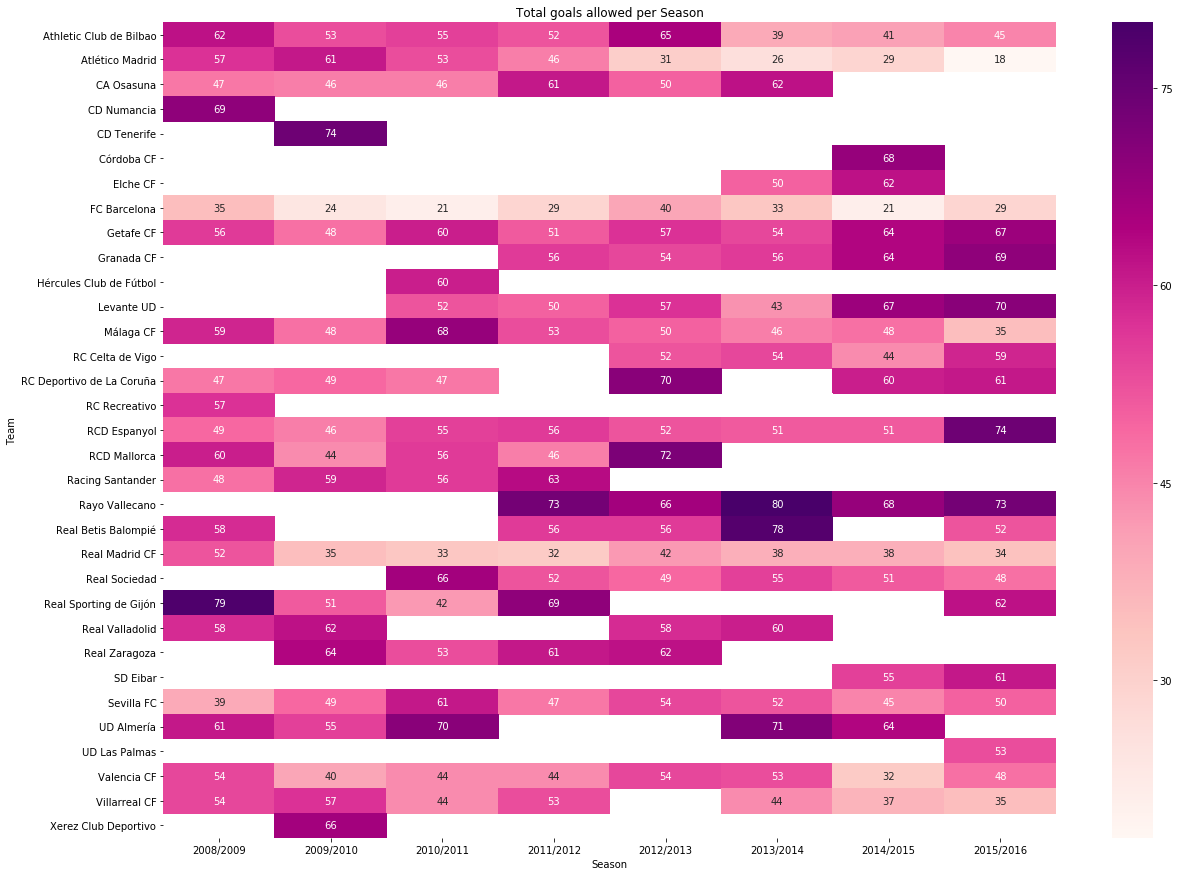

In [24]:
season_team_allowed_sum = reset_index_pivot_plot_series('heat_map', 'RdPu', season_team_allowed_sum, \
    'Team', 'Season', 'Team_Allowed', 'Total goals allowed per Season', 'Season', 'Team', False, False)

## Question 6b: How teams deteriorated over time and what teams deteriorated the most and the least in terms of goals allowed over time?
## Answer 6b: Total goals allowed over Seasons

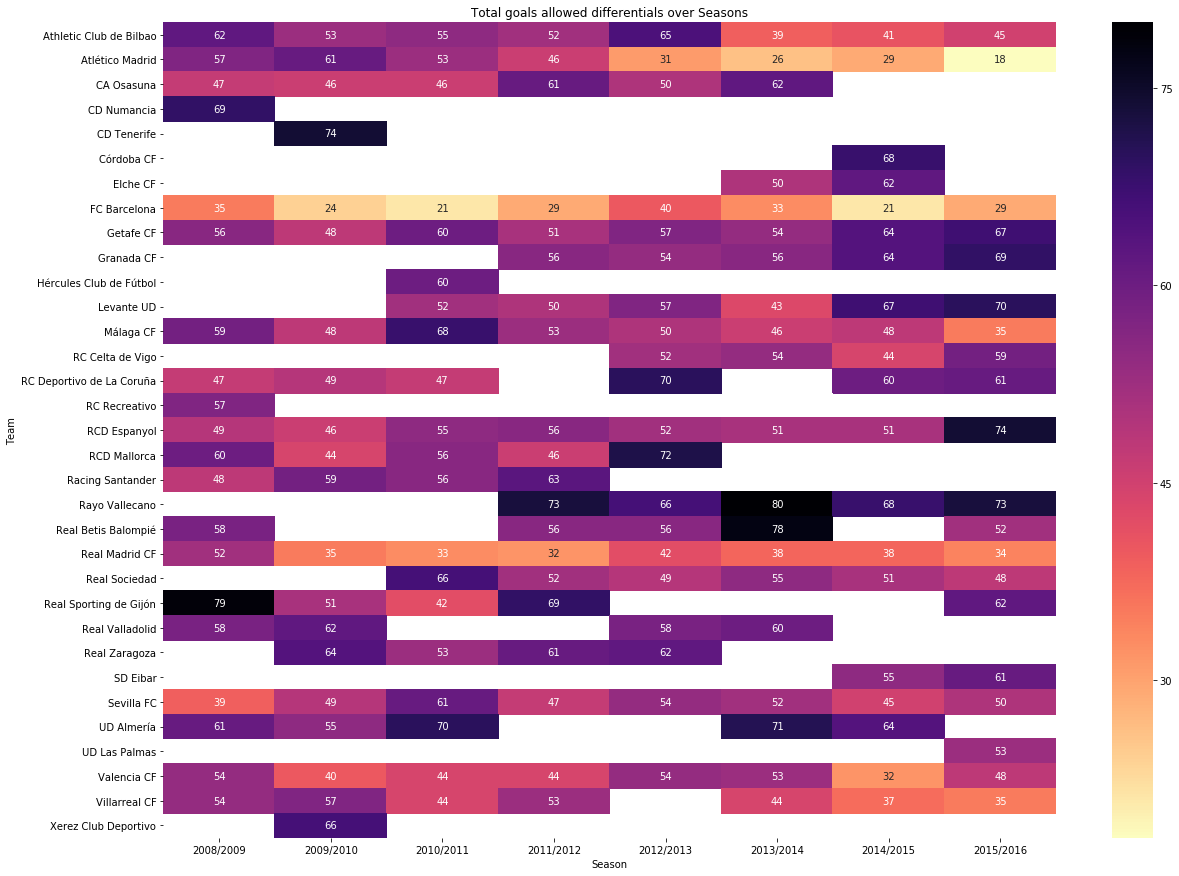

In [25]:
season_team_allowed_sum_diff = season_team_allowed_sum.diff(periods=1, axis='columns')

season_team_allowed_sum = reset_index_pivot_plot_series('heat_map', 'magma_r', season_team_allowed_sum, \
    'Team', 'Season', 'Team_Allowed', 'Total goals allowed differentials over Seasons', 'Season', 'Team', False, False)

## Team matches statistics and forecasts/projections

## Compute number of unique seasons

In [26]:
unique_seasons = pd.Series(spain_liga_bbva_df['Season'].unique())

## A reminder of the structure of our original League DataFrame

In [27]:
spain_liga_bbva_df.head()

,Country,League,Season,Date,Team_Home,Team_Away,Team_Home_Goal,Team_Away_Goal
0,Spain,Spain LIGA BBVA,2008/2009,2008-08-30,Valencia CF,RCD Mallorca,3,0
1,Spain,Spain LIGA BBVA,2008/2009,2008-08-30,RCD Espanyol,Real Valladolid,1,0
2,Spain,Spain LIGA BBVA,2008/2009,2008-08-31,CA Osasuna,Villarreal CF,1,1
3,Spain,Spain LIGA BBVA,2008/2009,2008-08-31,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,Spain,Spain LIGA BBVA,2008/2009,2008-08-31,CD Numancia,FC Barcelona,1,0


## Group original spain_liga_bbva_df DataFrame by Team_Home and Team_Away goals scored and allowed

In [28]:
team_match_goal_sum = spain_liga_bbva_df.groupby(['Team_Home', 'Team_Away'])['Team_Home_Goal', 'Team_Away_Goal'].sum()
team_match_goal_sum.head()

Team_Home_Goal  Team_Away_Goal
Team_Home               Team_Away                                      
Athletic Club de Bilbao Atlético Madrid              11              13
                        CA Osasuna                   11               1
                        CD Numancia                   2               0
                        CD Tenerife                   4               1
                        Córdoba CF                    0               1

## Question 7a: How many goals has each team scored home, against other teams, over all seasons?
## Answer 7a: Home goals scored against other teams

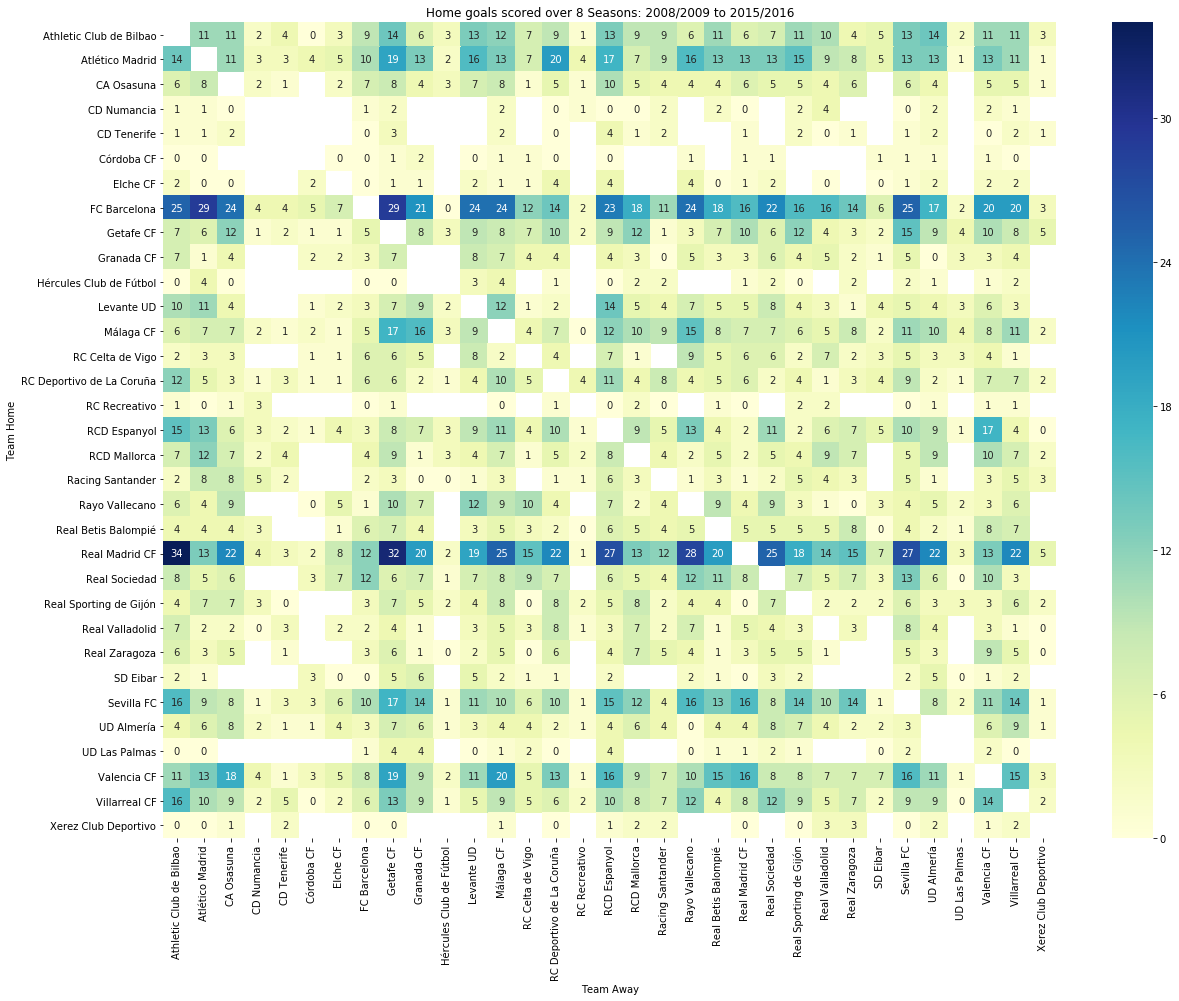

Team_Away,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Home,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,11.0,11.0,2.0,4.0,0.0,3.0,9.0,14.0,6.0,...,11.0,10.0,4.0,5.0,13.0,14.0,2.0,11.0,11.0,3.0
Atlético Madrid,14.0,NaN,11.0,3.0,3.0,4.0,5.0,10.0,19.0,13.0,...,15.0,9.0,8.0,5.0,13.0,13.0,1.0,13.0,11.0,1.0
CA Osasuna,6.0,8.0,NaN,2.0,1.0,NaN,2.0,7.0,8.0,4.0,...,5.0,4.0,6.0,NaN,6.0,4.0,NaN,5.0,5.0,1.0
CD Numancia,1.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,2.0,4.0,NaN,NaN,0.0,2.0,NaN,2.0,1.0,NaN
CD Tenerife,1.0,1.0,2.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,...,2.0,0.0,1.0,NaN,1.0,2.0,NaN,0.0,2.0,1.0


In [29]:
team_match_home_goal_sum = reset_index_pivot_plot_series('heat_map', 'YlGnBu', team_match_goal_sum, \
    'Team_Home', 'Team_Away', 'Team_Home_Goal', \
    'Home goals scored over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team Away', 'Team Home', True, True)

team_match_home_goal_sum.head()

## Question 7b: How many goals has each team scored away, against other teams, over all seasons?
## Answer 7b: Away goals scored against other teams

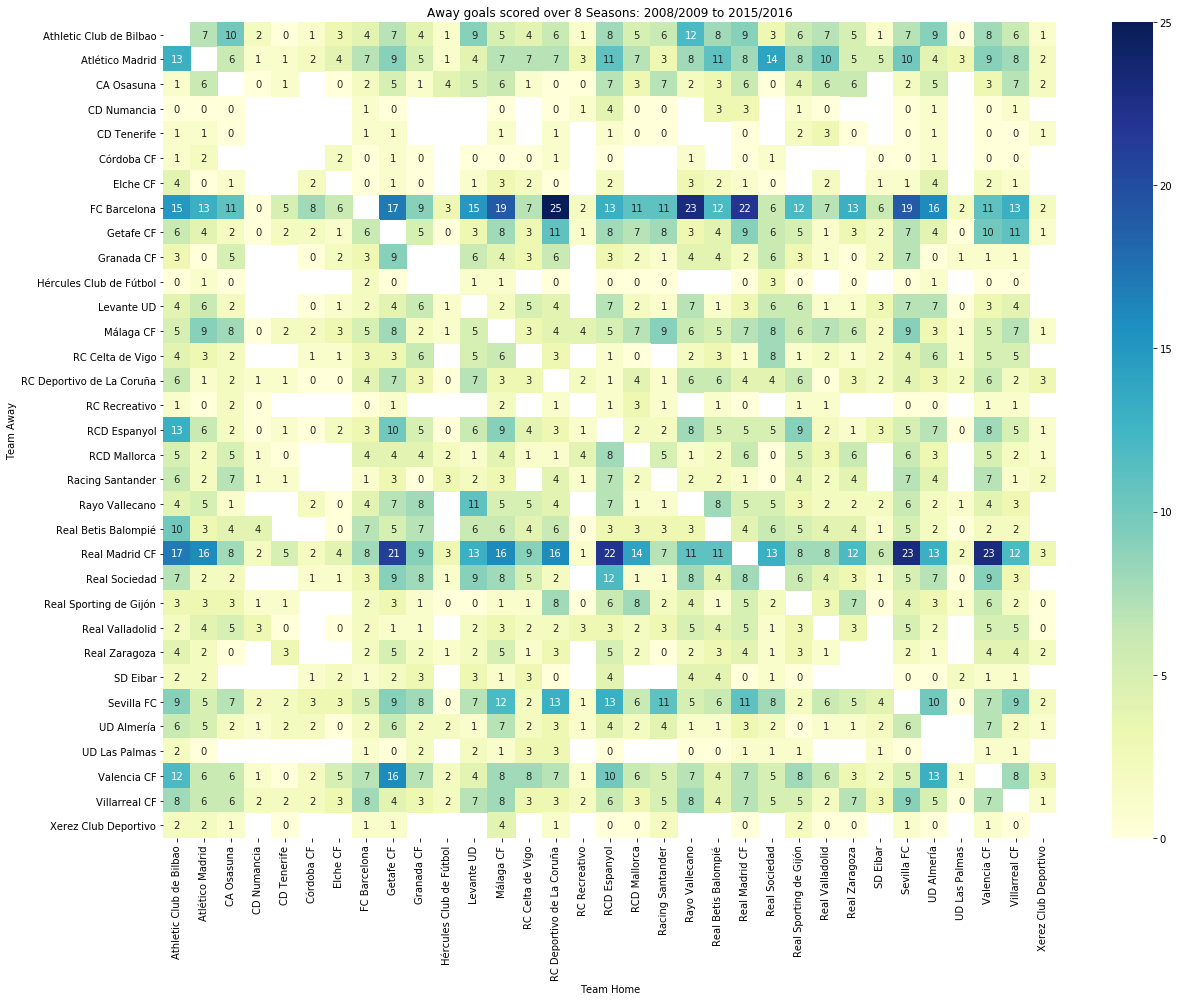

Team_Home,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Away,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,7.0,10.0,2.0,0.0,1.0,3.0,4.0,7.0,4.0,...,6.0,7.0,5.0,1.0,7.0,9.0,0.0,8.0,6.0,1.0
Atlético Madrid,13.0,NaN,6.0,1.0,1.0,2.0,4.0,7.0,9.0,5.0,...,8.0,10.0,5.0,5.0,10.0,4.0,3.0,9.0,8.0,2.0
CA Osasuna,1.0,6.0,NaN,0.0,1.0,NaN,0.0,2.0,5.0,1.0,...,4.0,6.0,6.0,NaN,2.0,5.0,NaN,3.0,7.0,2.0
CD Numancia,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,...,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,1.0,NaN
CD Tenerife,1.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,2.0,3.0,0.0,NaN,0.0,1.0,NaN,0.0,0.0,1.0


In [30]:
team_match_away_goal_sum = reset_index_pivot_plot_series('heat_map', 'YlGnBu', team_match_goal_sum, \
    'Team_Away', 'Team_Home', 'Team_Away_Goal', \
    'Away goals scored over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team Home', 'Team Away', True, True)

team_match_away_goal_sum.head()

## Question 7c: How many goals has each team scored, against other teams, over all seasons
## Answer 7c: Total goals scored against other teams

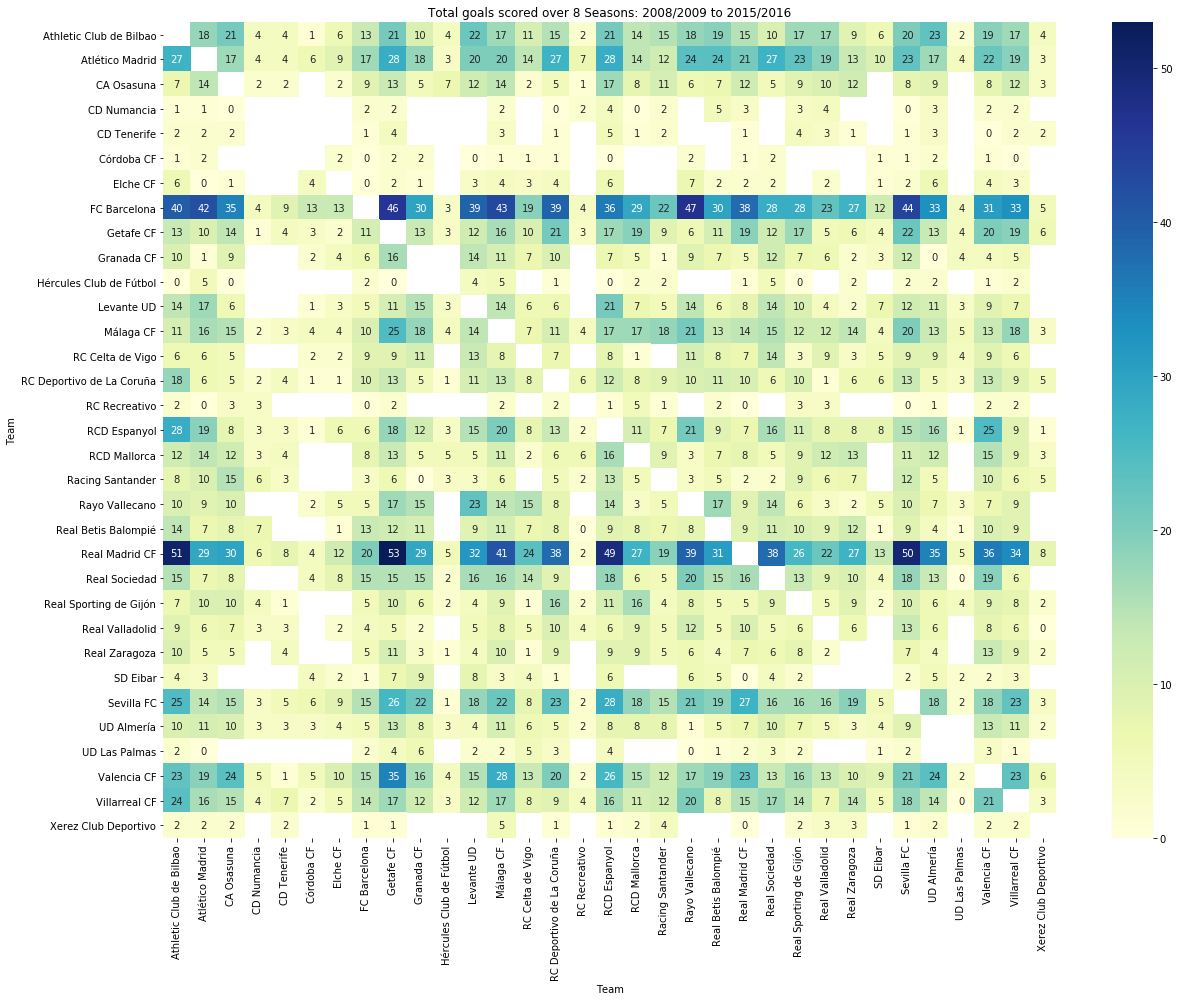

Team_Away,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Home,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,18.0,21.0,4.0,4.0,1.0,6.0,13.0,21.0,10.0,...,17.0,17.0,9.0,6.0,20.0,23.0,2.0,19.0,17.0,4.0
Atlético Madrid,27.0,NaN,17.0,4.0,4.0,6.0,9.0,17.0,28.0,18.0,...,23.0,19.0,13.0,10.0,23.0,17.0,4.0,22.0,19.0,3.0
CA Osasuna,7.0,14.0,NaN,2.0,2.0,NaN,2.0,9.0,13.0,5.0,...,9.0,10.0,12.0,NaN,8.0,9.0,NaN,8.0,12.0,3.0
CD Numancia,1.0,1.0,0.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,...,3.0,4.0,NaN,NaN,0.0,3.0,NaN,2.0,2.0,NaN
CD Tenerife,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,...,4.0,3.0,1.0,NaN,1.0,3.0,NaN,0.0,2.0,2.0


In [31]:
team_match_total_goal_sum = team_match_home_goal_sum + team_match_away_goal_sum

team_match_total_goal_sum = reset_index_pivot_plot_series('heat_map', 'YlGnBu', team_match_total_goal_sum, \
    '', '', '', \
    'Total goals scored over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team', 'Team', False, False)

team_match_total_goal_sum.head()

## Question 8a: How many goals has each team allowed home, from other teams, over all seasons?
## Answer 8a: Home goals allowed from other teams

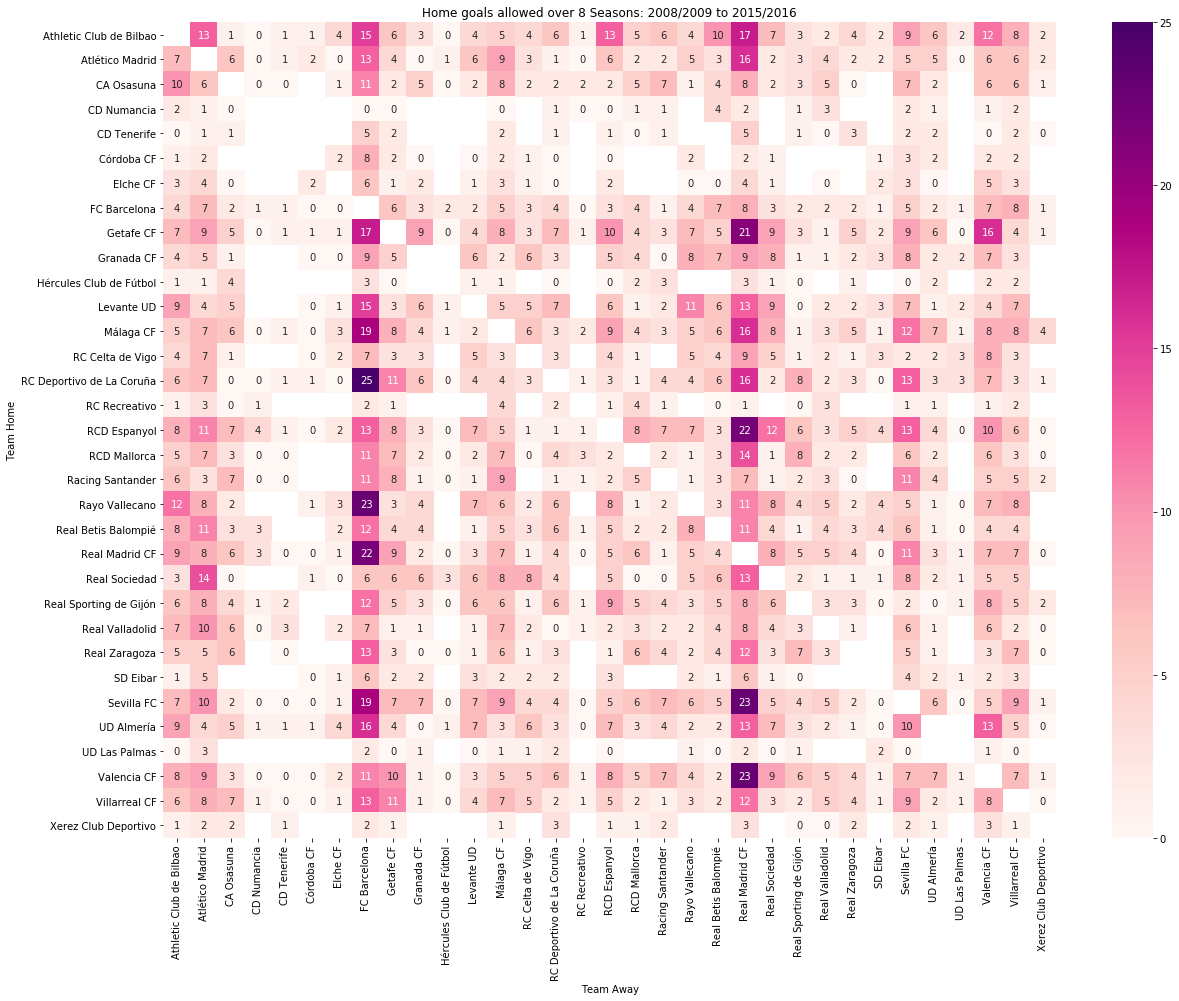

Team_Away,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Home,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,13.0,1.0,0.0,1.0,1.0,4.0,15.0,6.0,3.0,...,3.0,2.0,4.0,2.0,9.0,6.0,2.0,12.0,8.0,2.0
Atlético Madrid,7.0,NaN,6.0,0.0,1.0,2.0,0.0,13.0,4.0,0.0,...,3.0,4.0,2.0,2.0,5.0,5.0,0.0,6.0,6.0,2.0
CA Osasuna,10.0,6.0,NaN,0.0,0.0,NaN,1.0,11.0,2.0,5.0,...,3.0,5.0,0.0,NaN,7.0,2.0,NaN,6.0,6.0,1.0
CD Numancia,2.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,1.0,3.0,NaN,NaN,2.0,1.0,NaN,1.0,2.0,NaN
CD Tenerife,0.0,1.0,1.0,NaN,NaN,NaN,NaN,5.0,2.0,NaN,...,1.0,0.0,3.0,NaN,2.0,2.0,NaN,0.0,2.0,0.0


In [32]:
team_match_home_allowed_sum = reset_index_pivot_plot_series('heat_map', 'RdPu', team_match_goal_sum, \
    'Team_Home', 'Team_Away', 'Team_Away_Goal', \
    'Home goals allowed over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team Away', 'Team Home', True, True)

team_match_home_allowed_sum.head()

## Question 8b: How many goals has each team allowed away, from other teams, over all seasons?
## Answer 8b: Away goals allowed from other teams

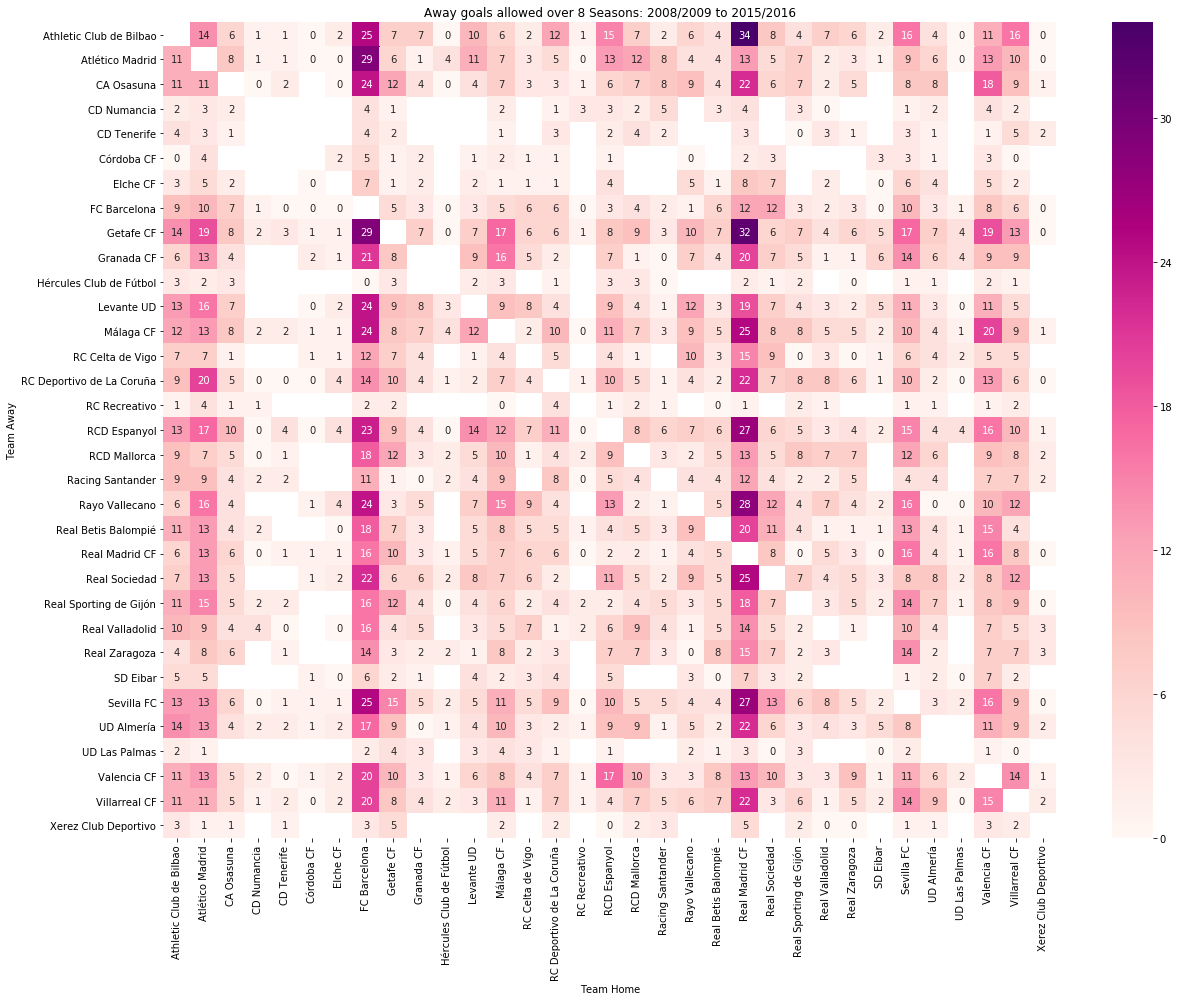

Team_Home,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Away,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,14.0,6.0,1.0,1.0,0.0,2.0,25.0,7.0,7.0,...,4.0,7.0,6.0,2.0,16.0,4.0,0.0,11.0,16.0,0.0
Atlético Madrid,11.0,NaN,8.0,1.0,1.0,0.0,0.0,29.0,6.0,1.0,...,7.0,2.0,3.0,1.0,9.0,6.0,0.0,13.0,10.0,0.0
CA Osasuna,11.0,11.0,NaN,0.0,2.0,NaN,0.0,24.0,12.0,4.0,...,7.0,2.0,5.0,NaN,8.0,8.0,NaN,18.0,9.0,1.0
CD Numancia,2.0,3.0,2.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,...,3.0,0.0,NaN,NaN,1.0,2.0,NaN,4.0,2.0,NaN
CD Tenerife,4.0,3.0,1.0,NaN,NaN,NaN,NaN,4.0,2.0,NaN,...,0.0,3.0,1.0,NaN,3.0,1.0,NaN,1.0,5.0,2.0


In [33]:
team_match_away_allowed_sum = reset_index_pivot_plot_series('heat_map', 'RdPu', team_match_goal_sum, \
    'Team_Away', 'Team_Home', 'Team_Home_Goal', \
    'Away goals allowed over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team Home', 'Team Away', True, True)

team_match_away_allowed_sum.head()

## Question 8c: How many goals has each team allowed, from other teams, over all seasons
## Answer 8c: Total goals allowed from other teams

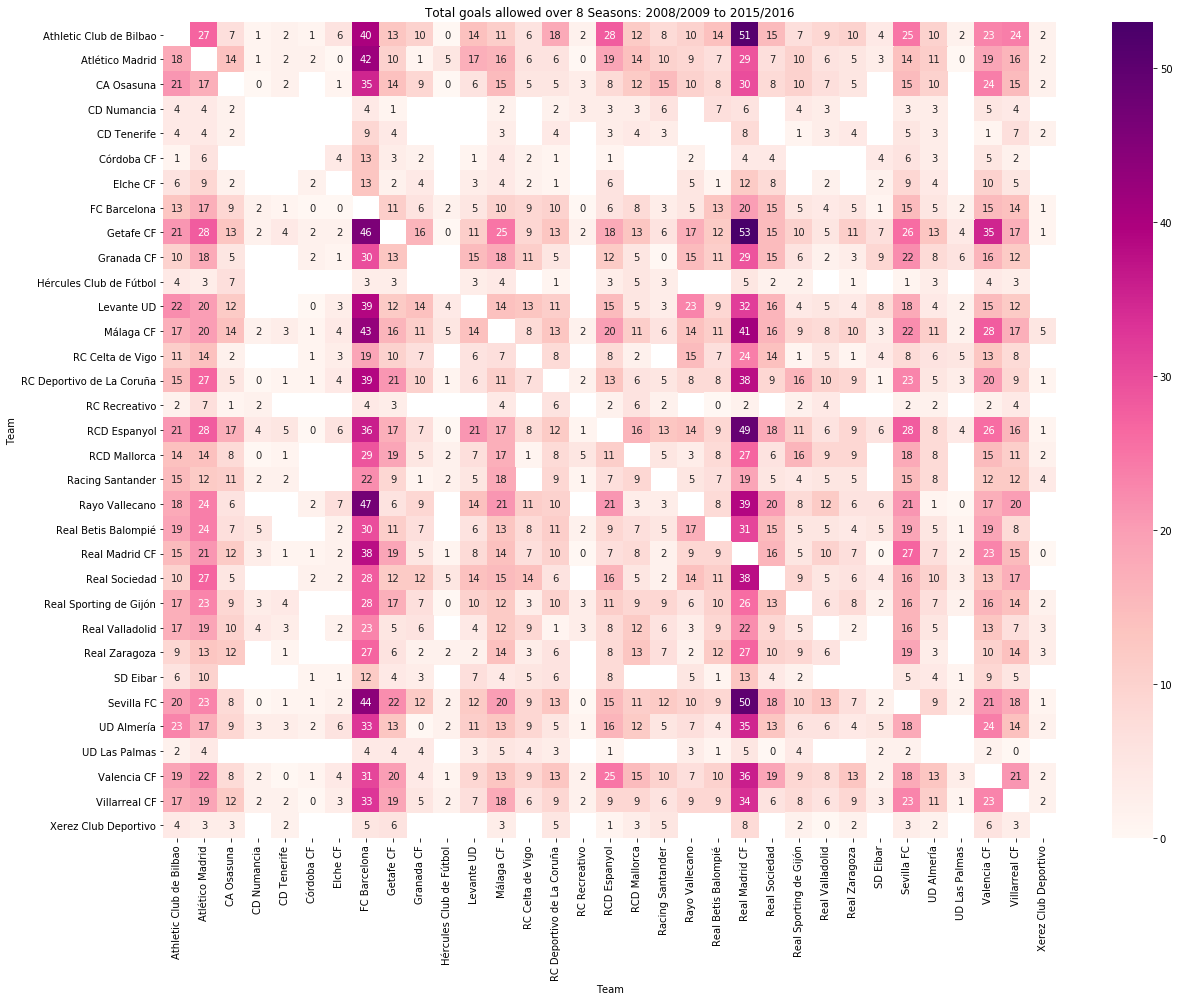

Team_Away,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Home,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,27.0,7.0,1.0,2.0,1.0,6.0,40.0,13.0,10.0,...,7.0,9.0,10.0,4.0,25.0,10.0,2.0,23.0,24.0,2.0
Atlético Madrid,18.0,NaN,14.0,1.0,2.0,2.0,0.0,42.0,10.0,1.0,...,10.0,6.0,5.0,3.0,14.0,11.0,0.0,19.0,16.0,2.0
CA Osasuna,21.0,17.0,NaN,0.0,2.0,NaN,1.0,35.0,14.0,9.0,...,10.0,7.0,5.0,NaN,15.0,10.0,NaN,24.0,15.0,2.0
CD Numancia,4.0,4.0,2.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,...,4.0,3.0,NaN,NaN,3.0,3.0,NaN,5.0,4.0,NaN
CD Tenerife,4.0,4.0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,NaN,...,1.0,3.0,4.0,NaN,5.0,3.0,NaN,1.0,7.0,2.0


In [34]:
team_match_total_allowed_sum = team_match_home_allowed_sum + team_match_away_allowed_sum

team_match_total_allowed_sum = reset_index_pivot_plot_series('heat_map', 'RdPu', team_match_total_allowed_sum, \
    '', '', '', \
    'Total goals allowed over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team', 'Team', False, False)

team_match_total_allowed_sum.head()

## Apart from individual goals scored or allowed, let us consider a match outcome in terms of win (more goals scored), tie (no goals or equal goals scored) or loss (rival team scored more goals) for each team.

In [35]:
"""
categorize_win_tie_loss(team_match_df) is used for categorizing the outcome of match as a win, tie or loss for the home team.

Args:
    team_match_df: Team match DataFrame with columns 'Team_Home_Goal' and 'Team_Away_Goal' available.
Returns:
    Updated DataFrame with 3 new columns created in case of a match home win, tie or loss.

Raises:
    None
"""
def categorize_win_tie_loss(team_match_df):
    #Reference
    #https://pandas.pydata.org/pandas-docs/stable/indexing.html#setting-with-enlargement
    team_match_df.loc[:, 'Team_Home_Win'] = 0
    team_match_df.loc[:, 'Team_Home_Tie'] = 0
    team_match_df.loc[:, 'Team_Away_Win'] = 0
    
    team_match_df.loc[team_match_df['Team_Home_Goal'] > team_match_df['Team_Away_Goal'], 'Team_Home_Win'] = 1
    team_match_df.loc[team_match_df['Team_Home_Goal'] == team_match_df['Team_Away_Goal'], 'Team_Home_Tie'] = 1
    team_match_df.loc[team_match_df['Team_Home_Goal'] < team_match_df['Team_Away_Goal'], 'Team_Away_Win'] = 1
    return team_match_df

## Enhance our original League Dataframe with win, tie or loss outcome for each match.

In [36]:
spain_liga_bbva_df = categorize_win_tie_loss(spain_liga_bbva_df)
spain_liga_bbva_df.head()

,Country,League,Season,Date,Team_Home,Team_Away,Team_Home_Goal,Team_Away_Goal,Team_Home_Win,Team_Home_Tie,Team_Away_Win
0,Spain,Spain LIGA BBVA,2008/2009,2008-08-30,Valencia CF,RCD Mallorca,3,0,1,0,0
1,Spain,Spain LIGA BBVA,2008/2009,2008-08-30,RCD Espanyol,Real Valladolid,1,0,1,0,0
2,Spain,Spain LIGA BBVA,2008/2009,2008-08-31,CA Osasuna,Villarreal CF,1,1,0,1,0
3,Spain,Spain LIGA BBVA,2008/2009,2008-08-31,RC Deportivo de La Coruña,Real Madrid CF,2,1,1,0,0
4,Spain,Spain LIGA BBVA,2008/2009,2008-08-31,CD Numancia,FC Barcelona,1,0,1,0,0


## Group original League DataFrame by Team_Home and Team_Away win, tie or loss after each match

In [72]:
team_match_outcome_sum = spain_liga_bbva_df.groupby(['Team_Home', 'Team_Away']) \
    ['Team_Home_Win', 'Team_Home_Tie', 'Team_Away_Win'].sum()
team_match_outcome_sum.head()

Team_Home_Win  Team_Home_Tie  \
Team_Home               Team_Away                                       
Athletic Club de Bilbao Atlético Madrid              3              0   
                        CA Osasuna                   6              0   
                        CD Numancia                  1              0   
                        CD Tenerife                  1              0   
                        Córdoba CF                   0              0   

                                         Team_Away_Win  
Team_Home               Team_Away                       
Athletic Club de Bilbao Atlético Madrid              5  
                        CA Osasuna                   0  
                        CD Numancia                  0  
                        CD Tenerife                  0  
                        Córdoba CF                   1

## Let's set a new index for our team_match_outcome_sum Dataframe as the pair of home and away teams of a match
## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html

In [56]:
team_match_outcome_sum = team_match_outcome_sum.reset_index()
team_match_outcome_sum = team_match_outcome_sum.set_index(['Team_Home', 'Team_Away'])

## Create a function that for each pair of teams (team1, team2) will add home wins for team1 with away wins for team1 for each pair of teams (team2, team1). Similarly for ties.

In [74]:
"""
add_home_and_away_wins_ties(team_match_df) is used to keep track of wins earned home or away for each pair of teams.
Similalry for ties, home or away.

Args:
    team_match_df: Team match DataFrame with columns ['Team_Home', 'Team_Away', 'Team_Home_Win', 'Team_Home_Tie', 'Team_Away_Win'] available.
Returns:
    Updated DataFrame with 2 new columns created, one for total wins, one for total ties.

Raises:
    None
"""
def add_home_and_away_wins_ties(team_match_df):
    team_match_df.loc[:, 'Team_Win'] = 0
    team_match_df.loc[:, 'Team_Tie'] = 0

    for pair in team_match_outcome_sum.index:
        team_match_df.loc[(pair[0], pair[1]), :]['Team_Win'] = team_match_df.loc[(pair[0], pair[1]), :]['Team_Home_Win'] + team_match_df.loc[(pair[1], pair[0]), :]['Team_Away_Win']
        team_match_df.loc[(pair[0], pair[1]), :]['Team_Tie'] = team_match_df.loc[(pair[0], pair[1]), :]['Team_Home_Tie'] + team_match_df.loc[(pair[1], pair[0]), :]['Team_Home_Tie']

    return team_match_df

In [75]:
team_match_outcome_sum = add_home_and_away_wins_ties(team_match_outcome_sum)

In [97]:
team_match_outcome_sum.head()

Team_Home_Win  Team_Home_Tie  \
Team_Home               Team_Away                                       
Athletic Club de Bilbao Atlético Madrid              3              0   
                        CA Osasuna                   6              0   
                        CD Numancia                  1              0   
                        CD Tenerife                  1              0   
                        Córdoba CF                   0              0   

                                         Team_Away_Win  Team_Win  Team_Tie  
Team_Home               Team_Away                                           
Athletic Club de Bilbao Atlético Madrid              5         5         1  
                        CA Osasuna                   0         9         1  
                        CD Numancia                  0         2         0  
                        CD Tenerife                  0         1         0  
                        Córdoba CF                   1         1         0

## Question 9a: How many times did each team win, against other teams, over all seasons?
## Answer 9a:  Wins against other teams

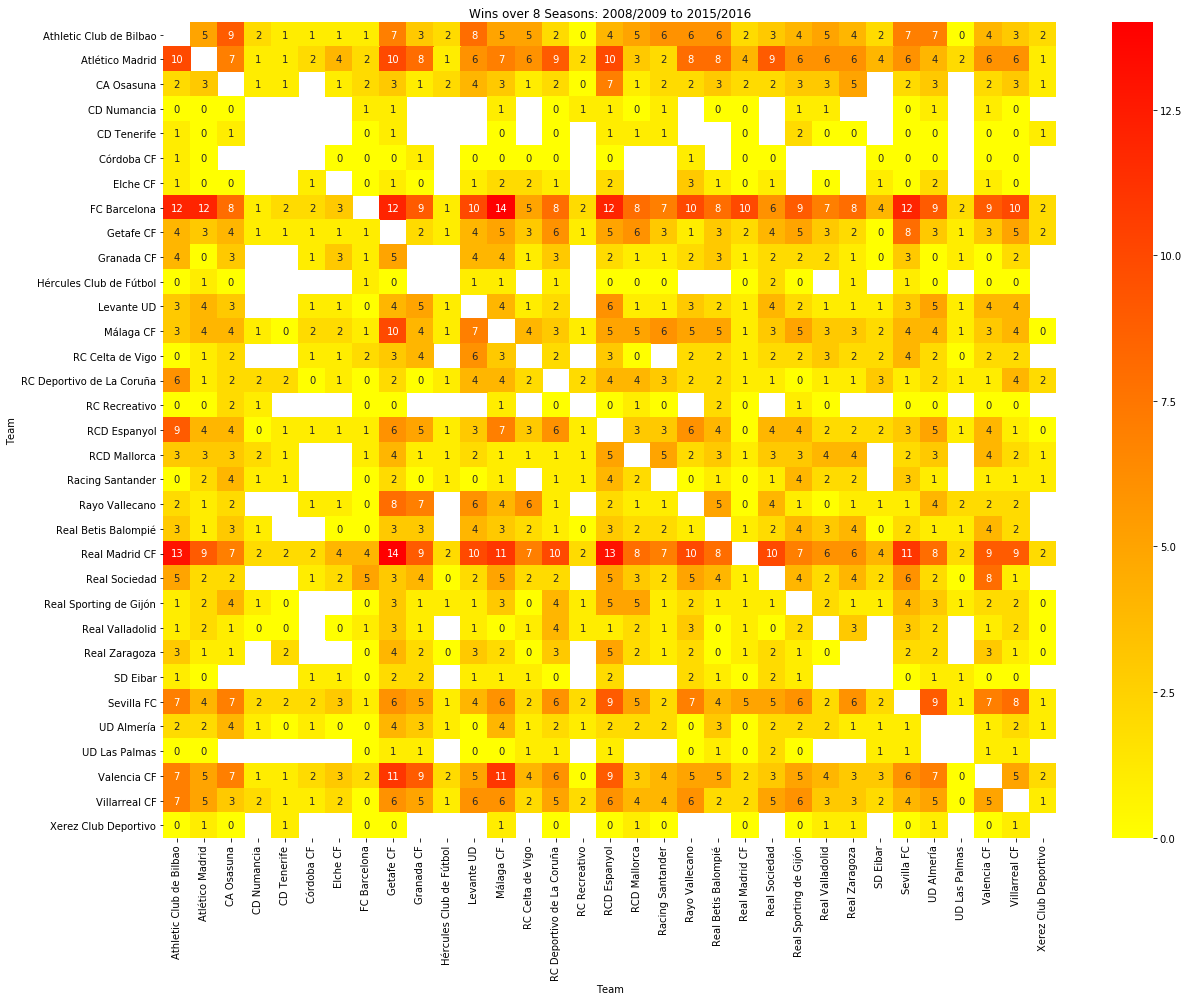

Team_Away,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Home,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,5.0,9.0,2.0,1.0,1.0,1.0,1.0,7.0,3.0,...,4.0,5.0,4.0,2.0,7.0,7.0,0.0,4.0,3.0,2.0
Atlético Madrid,10.0,NaN,7.0,1.0,1.0,2.0,4.0,2.0,10.0,8.0,...,6.0,6.0,6.0,4.0,6.0,4.0,2.0,6.0,6.0,1.0
CA Osasuna,2.0,3.0,NaN,1.0,1.0,NaN,1.0,2.0,3.0,1.0,...,3.0,3.0,5.0,NaN,2.0,3.0,NaN,2.0,3.0,1.0
CD Numancia,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,0.0,1.0,NaN,1.0,0.0,NaN
CD Tenerife,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,...,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0


In [110]:
team_match_win_sum = reset_index_pivot_plot_series('heat_map', 'autumn_r', team_match_outcome_sum, \
    'Team_Home', 'Team_Away', 'Team_Win', \
    'Wins over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team', 'Team', True, True)

team_match_win_sum.head()

## Question 9b: How many times did each team tie, against other teams, over all seasons?
## Answer 9b: Ties against other teams
## Note that this is the first time we encounter a symmetric martix where entry[team1, team2] is the same as entry[team2, team1]

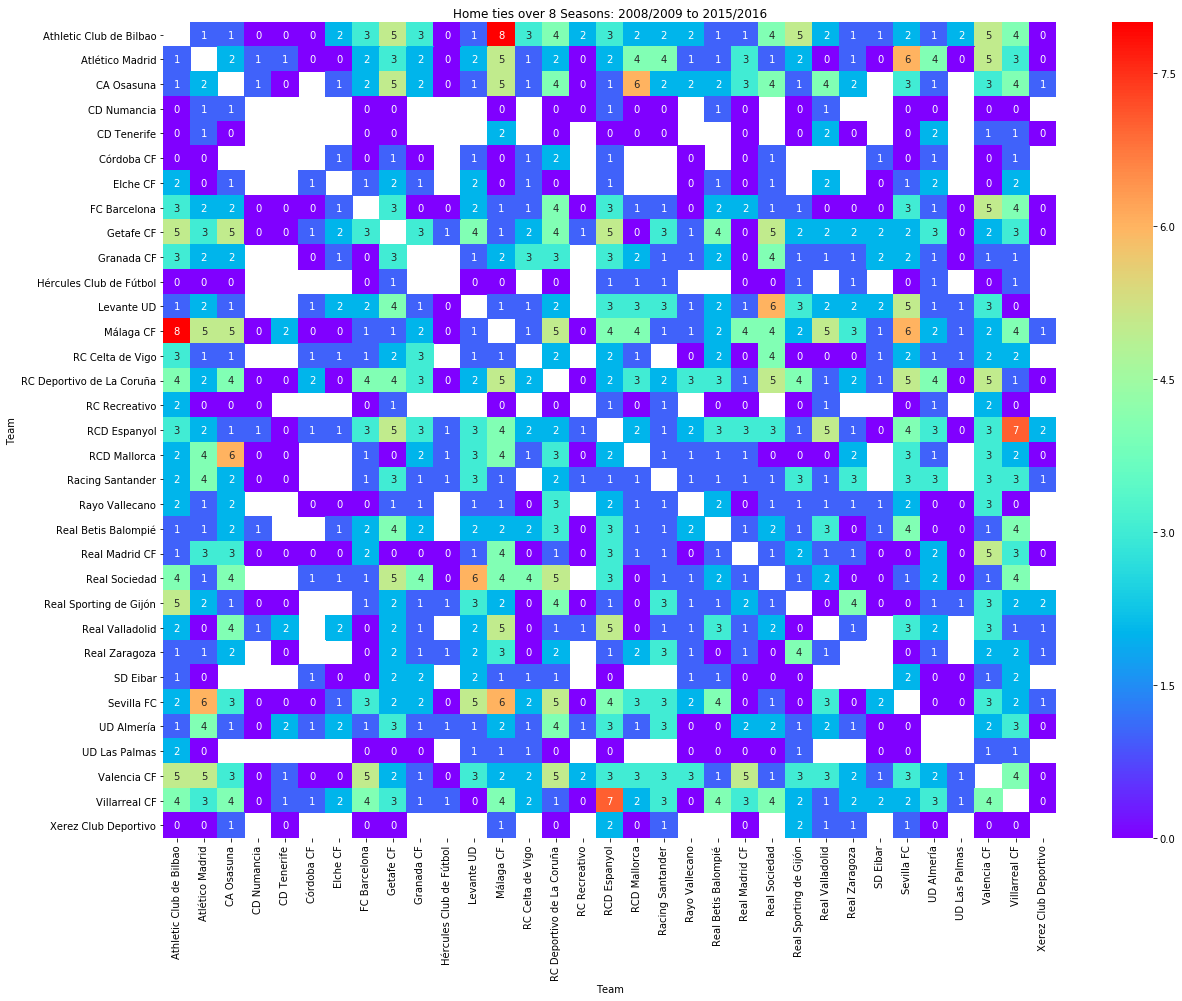

Team_Away,Athletic Club de Bilbao,Atlético Madrid,CA Osasuna,CD Numancia,CD Tenerife,Córdoba CF,Elche CF,FC Barcelona,Getafe CF,Granada CF,...,Real Sporting de Gijón,Real Valladolid,Real Zaragoza,SD Eibar,Sevilla FC,UD Almería,UD Las Palmas,Valencia CF,Villarreal CF,Xerez Club Deportivo
Team_Home,,,,,,,,,,,,,,,,,,,,,
Athletic Club de Bilbao,NaN,1.0,1.0,0.0,0.0,0.0,2.0,3.0,5.0,3.0,...,5.0,2.0,1.0,1.0,2.0,1.0,2.0,5.0,4.0,0.0
Atlético Madrid,1.0,NaN,2.0,1.0,1.0,0.0,0.0,2.0,3.0,2.0,...,2.0,0.0,1.0,0.0,6.0,4.0,0.0,5.0,3.0,0.0
CA Osasuna,1.0,2.0,NaN,1.0,0.0,NaN,1.0,2.0,5.0,2.0,...,1.0,4.0,2.0,NaN,3.0,1.0,NaN,3.0,4.0,1.0
CD Numancia,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN
CD Tenerife,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0.0,2.0,0.0,NaN,0.0,2.0,NaN,1.0,1.0,0.0


In [109]:
team_match_tie_sum = reset_index_pivot_plot_series('heat_map', 'rainbow', team_match_outcome_sum, \
    'Team_Home', 'Team_Away', 'Team_Tie', \
    'Home ties over '+str(unique_seasons.size)+' Seasons: '+unique_seasons.iloc[0]+' to '+unique_seasons.iloc[-1], \
    'Team', 'Team', True, True)

team_match_tie_sum.head()

In [83]:
spain_liga_bbva_df.describe()

,Team_Home_Goal,Team_Away_Goal,Team_Home_Win,Team_Home_Tie,Team_Away_Win
count,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000
mean,1.631250,1.135855,0.488487,0.231579,0.279934
std,1.388339,1.161079,0.499950,0.421911,0.449041
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,0.000000,1.000000
max,10.000000,8.000000,1.000000,1.000000,1.000000


## Try it on your own! Feel free to take a deep dive into another Country and League
## Simply go to cell 8 above where we defined our query to our local sqlite database and change the Country and League name filters to your own favorites.
...  
Country = 'Spain' AND  
League.name = 'Spain LIGA BBVA'  
...  
## Everything until this point will work regardless of which Country and League you selected.
## The remaining short part applies only to the Spanish BBVA League. As a reminder, you can adopt it to your own rival teams within your favorite League.

## El Clásico
## El Clásico is the name given in football to any match between fierce rivals FC Barcelona and Real Madrid.
## https://en.wikipedia.org/wiki/El_Clásico

## All El Clásico matches in our dataset

In [84]:
FCB = 'FC Barcelona'
RMCF = 'Real Madrid CF'
spain_liga_bbva_df[((spain_liga_bbva_df['Team_Home'] == FCB) & (spain_liga_bbva_df['Team_Away'] == RMCF)) \
                  | ((spain_liga_bbva_df['Team_Home'] == RMCF) & (spain_liga_bbva_df['Team_Away'] == FCB))]

,Country,League,Season,Date,Team_Home,Team_Away,Team_Home_Goal,Team_Away_Goal,Team_Home_Win,Team_Home_Tie,Team_Away_Win
140,Spain,Spain LIGA BBVA,2008/2009,2008-12-13,FC Barcelona,Real Madrid CF,2,0,1,0,0
331,Spain,Spain LIGA BBVA,2008/2009,2009-05-02,Real Madrid CF,FC Barcelona,2,6,0,0,1
497,Spain,Spain LIGA BBVA,2009/2010,2009-11-29,FC Barcelona,Real Madrid CF,1,0,1,0,0
684,Spain,Spain LIGA BBVA,2009/2010,2010-04-10,Real Madrid CF,FC Barcelona,0,2,0,0,1
889,Spain,Spain LIGA BBVA,2010/2011,2010-11-29,FC Barcelona,Real Madrid CF,5,0,1,0,0
1072,Spain,Spain LIGA BBVA,2010/2011,2011-04-16,Real Madrid CF,FC Barcelona,1,1,0,1,0
1283,Spain,Spain LIGA BBVA,2011/2012,2011-12-10,Real Madrid CF,FC Barcelona,1,3,0,0,1
1470,Spain,Spain LIGA BBVA,2011/2012,2012-04-21,FC Barcelona,Real Madrid CF,1,2,0,0,1
1589,Spain,Spain LIGA BBVA,2012/2013,2012-10-07,FC Barcelona,Real Madrid CF,2,2,0,1,0
1773,Spain,Spain LIGA BBVA,2012/2013,2013-03-02,Real Madrid CF,FC Barcelona,2,1,1,0,0


## Match outcomes in goals when 'FC Barcelona' played at home (see corresponding graph and questions 7a, 8a above)

In [87]:
spain_liga_bbva_df[((spain_liga_bbva_df['Team_Home'] == FCB) & (spain_liga_bbva_df['Team_Away'] == RMCF)) ][['Team_Home_Goal','Team_Away_Goal']].sum()

Team_Home_Goal    16
Team_Away_Goal     8
dtype: int64

## Match outcomes in goals when 'Real Madrid CF' played at home (see corresponding graph and questions 7b, 8b above)

In [86]:
spain_liga_bbva_df[((spain_liga_bbva_df['Team_Home'] == RMCF) & (spain_liga_bbva_df['Team_Away'] == FCB)) ][['Team_Home_Goal','Team_Away_Goal']].sum()

Team_Home_Goal    12
Team_Away_Goal    22
dtype: int64

## Match outcomes in number of wins of 'FC Barcelona' over  'Real Madrid CF' (see corresponding graph and questions 9a above)

In [91]:
team_match_win_sum.loc[(FCB, RMCF)]

10.0

## Match outcomes in number of wins of 'Real Madrid CF' over 'FC Barcelona' (see corresponding graph and questions 9a above)

In [92]:
team_match_win_sum.loc[(RMCF, FCB)]

4.0

## Match outcomes in number of ties of the pair 'FC Barcelona',  'Real Madrid CF' (see corresponding graph and questions 9b above)

In [99]:
team_match_tie_sum.loc[(FCB, RMCF)] #same as team_match_tie_sum.loc[(RMCF, FCB)] since matrix team_match_tie_sum is symmetric

2.0

## Additional Material - Appendix

## Matplotlib colormap reference  
https://matplotlib.org/examples/color/colormaps_reference.html
## Personal favorites for displaying positive impact: 'YlGnBu', 'cool'
## Personal favorites for displaying negative impact: 'RdPu', 'magma_r', 'plasma_r'

In [ ]:
#plot_colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
plot_colors = ['YlGnBu', 'cool', 'RdPu', 'magma_r', 'plasma_r']

for plot_color in plot_colors:
    season_team_home_goal_sum = reset_index_pivot_plot_series('heat_map', plot_color, season_team_home_goal_sum, \
    'Team_Home', 'Season', 'Team_Home_Goal', plot_color + ' - Home goals scored per Season', 'Team', 'Home Goals Scored', False, False)